# Data Loading and Preprocessing

This notebook handles data loading, outlier detection, normalization, and class balancing.

In [ ]:
# Import required libraries
# %pip install imbalanced-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

## 1. Data Loading and Initial Analysis

In [ ]:
# Load data
df = pd.read_csv("data.csv")
print(f"Data loaded: {df.shape[0]} rows, {df.shape[1]} columns")

# Display basic information
print("\nDataset Information:")
print(df.info())

print("\nSample of data:")
print(df.head())

print("\nBasic statistics:")
print(df.describe())

Data loaded: 589876 rows, 11 columns

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589876 entries, 0 to 589875
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CO2          589876 non-null  int64  
 1   TVOC         589876 non-null  int64  
 2   PM10         589876 non-null  float64
 3   PM2.5        589876 non-null  float64
 4   CO           589876 non-null  int64  
 5   Air Quality  589876 non-null  int64  
 6   LDR          589876 non-null  int64  
 7   O3           589876 non-null  int64  
 8   Temp         589876 non-null  float64
 9   Hum          589876 non-null  float64
 10  ts           589876 non-null  object 
dtypes: float64(4), int64(6), object(1)
memory usage: 49.5+ MB
None

Sample of data:
   CO2  TVOC   PM10  PM2.5   CO  Air Quality  LDR   O3  Temp   Hum  \
0  592    29  10.30    9.0  352          148  974  623  24.0  47.2   
1  592    29  10.31   10.1  304          136  

## 2. Air Quality Categorization

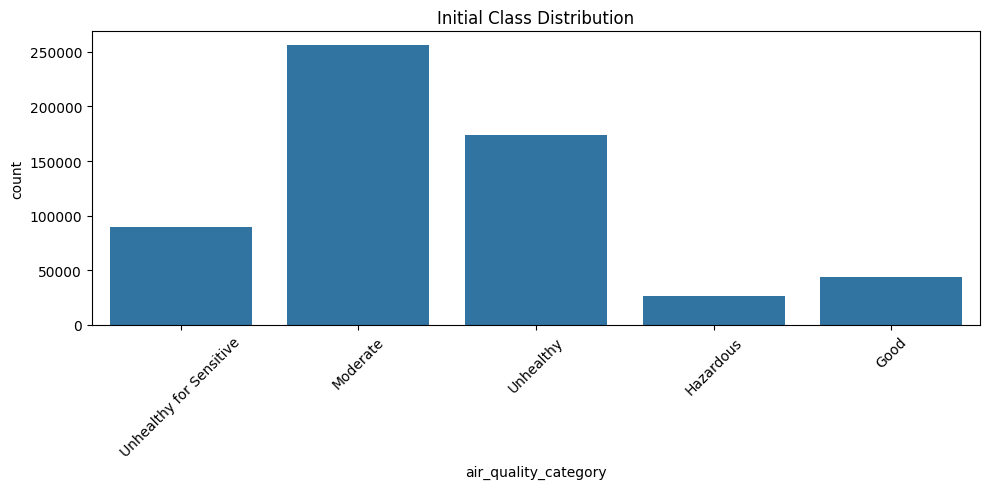


Class distribution:
air_quality_category
Moderate                   255994
Unhealthy                  174047
Unhealthy for Sensitive     89972
Good                        43768
Hazardous                   26095
Name: count, dtype: int64


In [ ]:
def categorize_air_quality(value):
    if 0 <= value <= 50:
        return "Good"
    elif 51 <= value <= 100:
        return "Moderate"
    elif 101 <= value <= 150:
        return "Unhealthy for Sensitive"
    elif 151 <= value <= 200:
        return "Unhealthy"
    elif 201 <= value <= 400:
        return "Hazardous"
    else:
        return "Unknown"


# Create categorical labels
df["air_quality_category"] = df["Air Quality"].apply(categorize_air_quality)

# Plot initial distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="air_quality_category")
plt.title("Initial Class Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nClass distribution:")
print(df["air_quality_category"].value_counts())

## 3. Outlier Detection and Handling

Processing outliers...


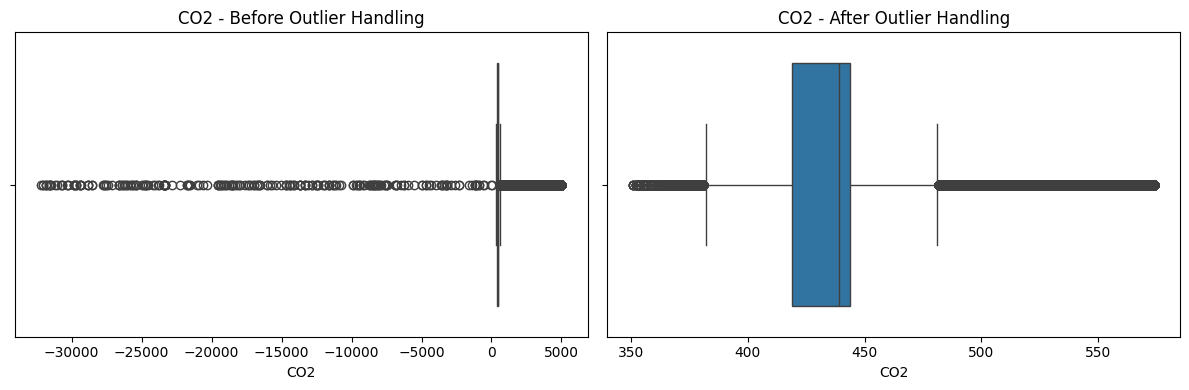


CO2 Statistics:
Outliers before: 109882 (18.63%)
Outliers after: 0 (0.00%)


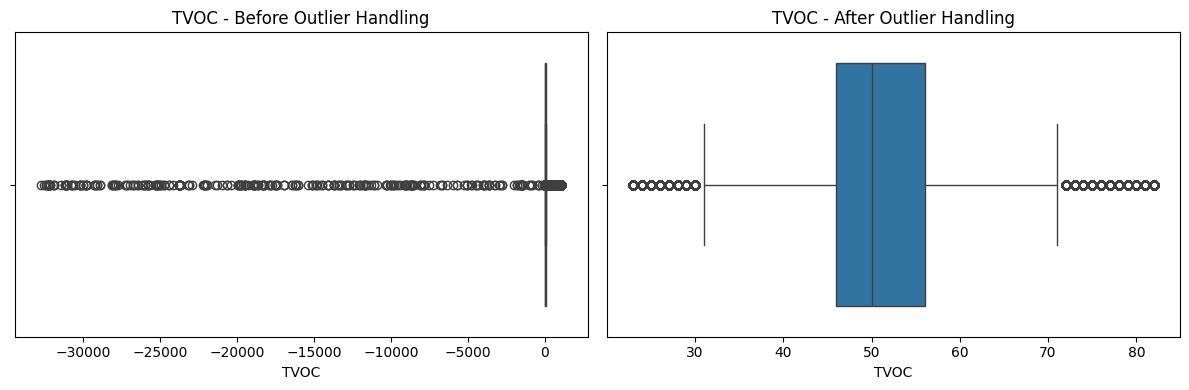


TVOC Statistics:
Outliers before: 90911 (15.41%)
Outliers after: 0 (0.00%)


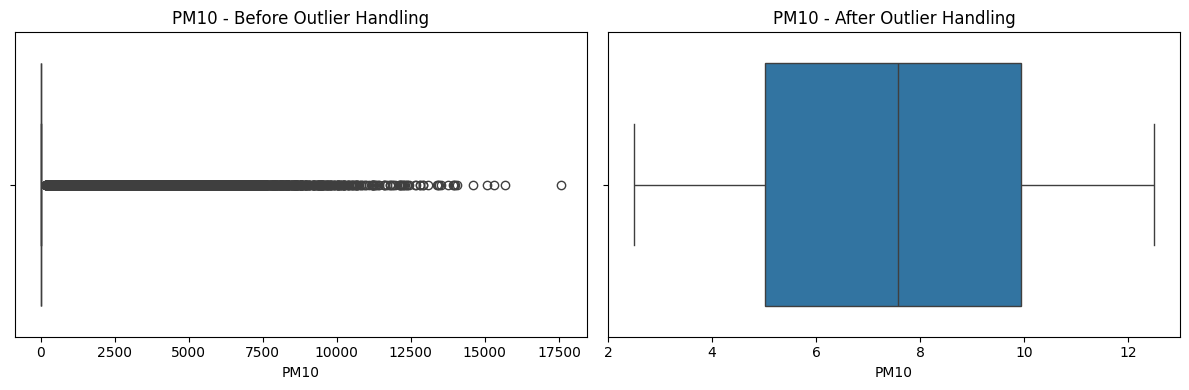


PM10 Statistics:
Outliers before: 10577 (1.79%)
Outliers after: 0 (0.00%)


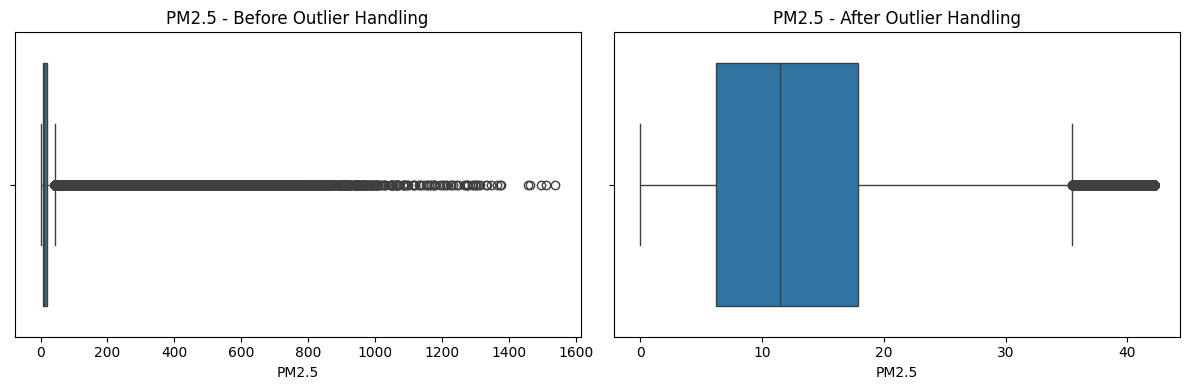


PM2.5 Statistics:
Outliers before: 32598 (5.53%)
Outliers after: 0 (0.00%)


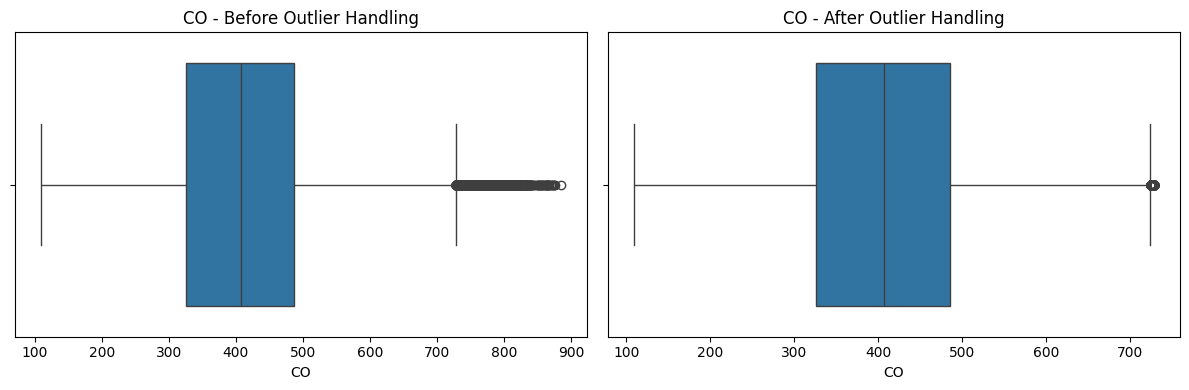


CO Statistics:
Outliers before: 2876 (0.49%)
Outliers after: 0 (0.00%)


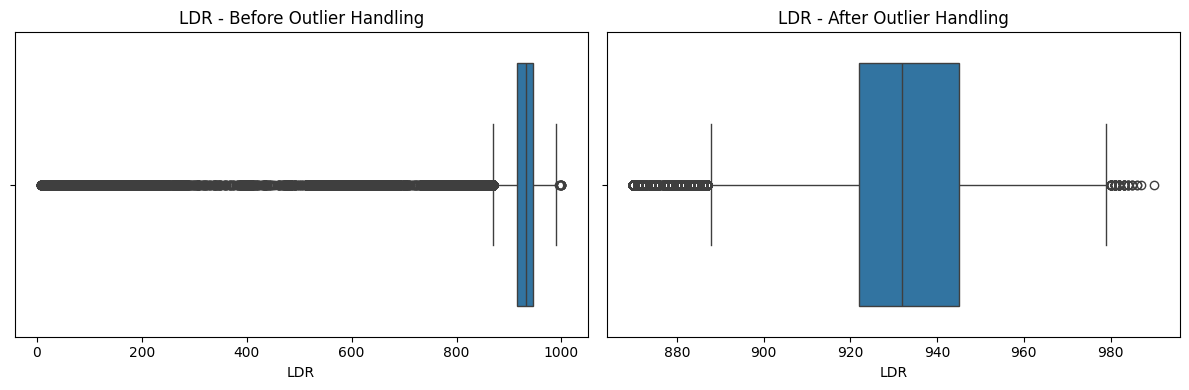


LDR Statistics:
Outliers before: 50727 (8.60%)
Outliers after: 0 (0.00%)


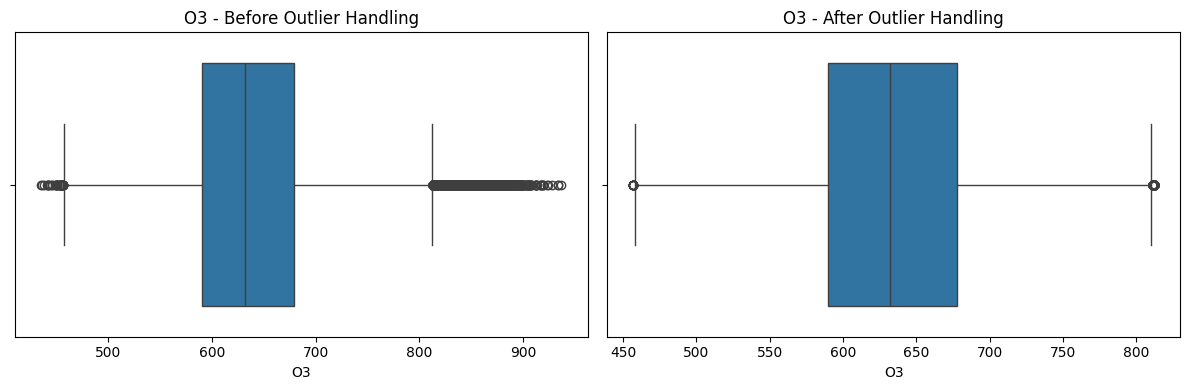


O3 Statistics:
Outliers before: 2792 (0.47%)
Outliers after: 0 (0.00%)


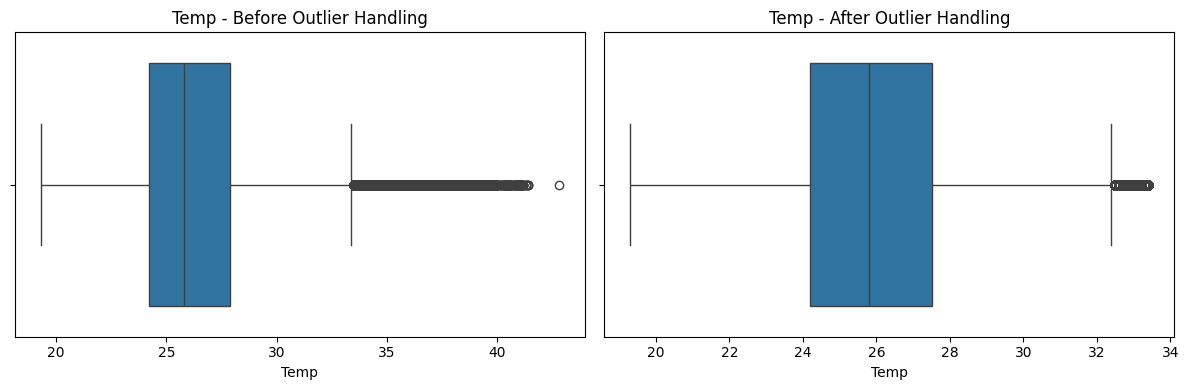


Temp Statistics:
Outliers before: 26438 (4.48%)
Outliers after: 0 (0.00%)


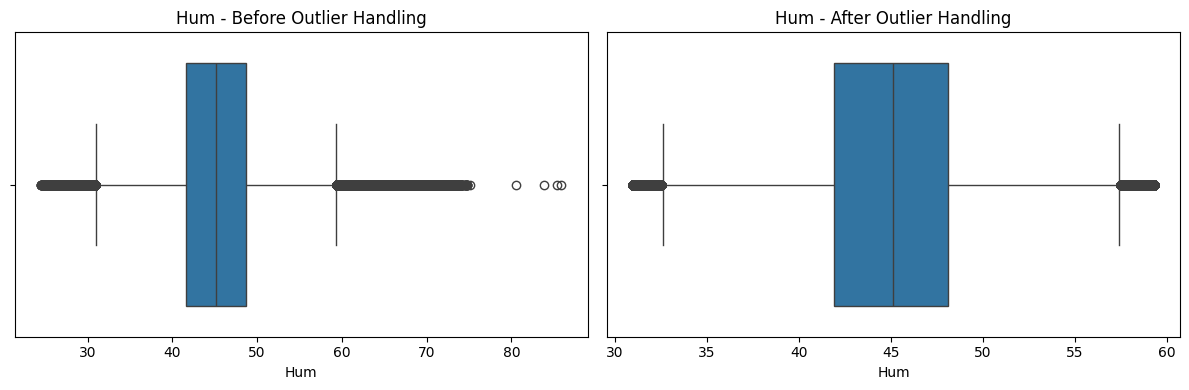


Hum Statistics:
Outliers before: 28241 (4.79%)
Outliers after: 0 (0.00%)


In [ ]:
def handle_outliers(df, columns):
    df_clean = df.copy()
    outlier_stats = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median_val = df[col].median()

        # Plot before and after boxplots
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        sns.boxplot(x=df[col])
        plt.title(f"{col} - Before Outlier Handling")

        # Replace outliers with median
        df_clean.loc[df_clean[col] < lower_bound, col] = median_val
        df_clean.loc[df_clean[col] > upper_bound, col] = median_val

        plt.subplot(1, 2, 2)
        sns.boxplot(x=df_clean[col])
        plt.title(f"{col} - After Outlier Handling")

        plt.tight_layout()
        plt.show()

        # Calculate statistics
        outliers_before = df[col][
            (df[col] < lower_bound) | (df[col] > upper_bound)
        ].count()
        outliers_after = df_clean[col][
            (df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)
        ].count()

        print(f"\n{col} Statistics:")
        print(
            f"Outliers before: {outliers_before} ({outliers_before/len(df[col])*100:.2f}%)"
        )
        print(
            f"Outliers after: {outliers_after} ({outliers_after/len(df[col])*100:.2f}%)"
        )

    return df_clean


# Define features
features = ["CO2", "TVOC", "PM10", "PM2.5", "CO", "LDR", "O3", "Temp", "Hum"]

# Handle outliers
print("Processing outliers...")
X = handle_outliers(df[features], features)

## 4. Feature Normalization

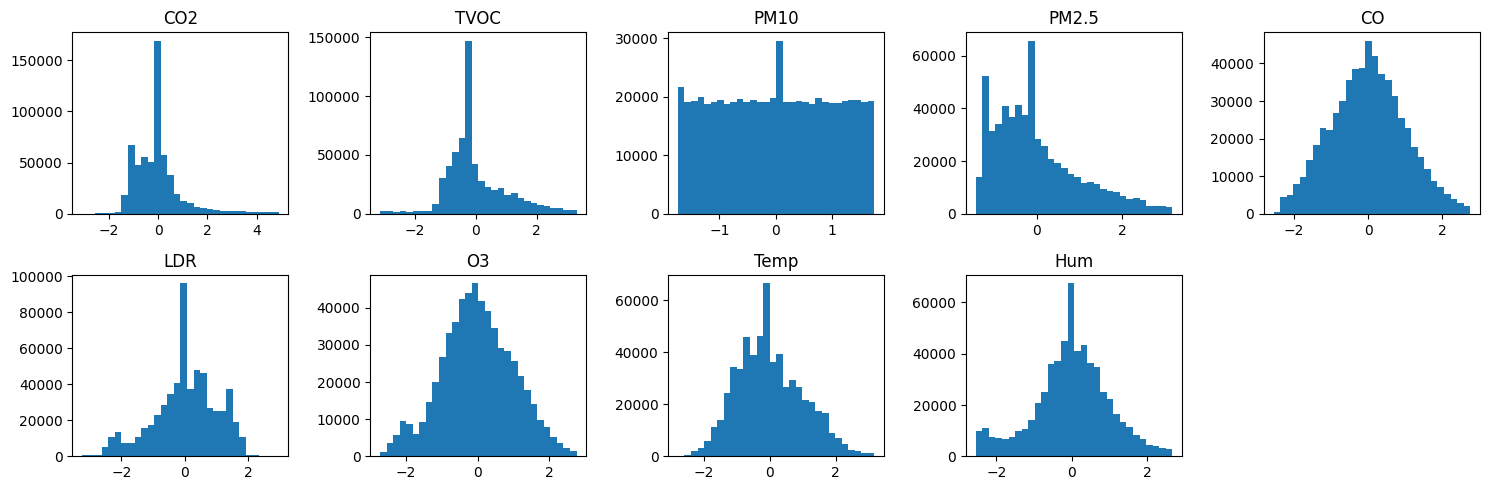

In [ ]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Prepare classification target
le = LabelEncoder()
y = le.fit_transform(df["air_quality_category"])

# Plot distribution of scaled features
plt.figure(figsize=(15, 5))
for i, feature in enumerate(features):
    plt.subplot(2, 5, i + 1)
    plt.hist(X_scaled[:, i], bins=30)
    plt.title(feature)
plt.tight_layout()
plt.show()

## 5. Train-Test Split and SMOTE

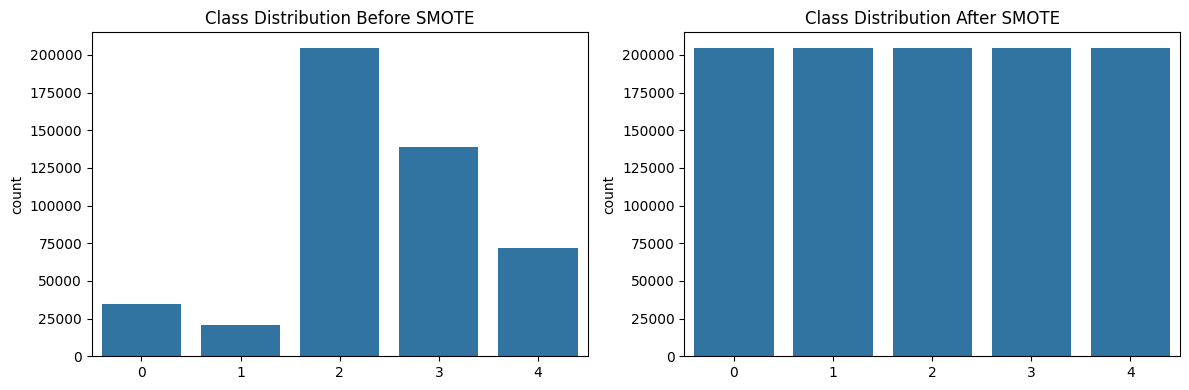


Class distribution after SMOTE:
3    204795
2    204795
4    204795
0    204795
1    204795
Name: count, dtype: int64


In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Plot class distribution before SMOTE
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title("Class Distribution Before SMOTE")

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Plot class distribution after SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_balanced)
plt.title("Class Distribution After SMOTE")

plt.tight_layout()
plt.show()

print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_balanced).value_counts())

# Save preprocessed data
np.save("preprocessed/X_train.npy", X_train_balanced)
np.save("preprocessed/X_test.npy", X_test)
np.save("preprocessed/y_train.npy", y_train_balanced)
np.save("preprocessed/y_test.npy", y_test)

---

# Model Definitions

This notebook contains the definitions for all required deep learning models:
1. 1D Convolutional Neural Network (1DCNN)
2. Recurrent Neural Network (RNN)
3. Deep Neural Network (DNN)
4. Long Short-Term Memory (LSTM)
5. Bidirectional LSTM (BiLSTM)
6. CNN-LSTM Hybrid
7. CNN-BiLSTM Hybrid

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    LSTM,
    Conv1D,
    Flatten,
    Bidirectional,
    MaxPooling1D,
    Dropout,
)

# Load preprocessed data to get input shape
X_train = np.load("preprocessed/X_train.npy")
y_train = np.load("preprocessed/y_train.npy")

# Get dimensions
num_features = X_train.shape[1]
num_classes = len(np.unique(y_train))

print(f"Input features: {num_features}")
print(f"Output classes: {num_classes}")

Input features: 9
Output classes: 5


# Model Definitions

This notebook contains the definitions for all required deep learning models:
1. 1D Convolutional Neural Network (1DCNN)
2. Recurrent Neural Network (RNN)
3. Deep Neural Network (DNN)
4. Long Short-Term Memory (LSTM)
5. Bidirectional LSTM (BiLSTM)
6. CNN-LSTM Hybrid
7. CNN-BiLSTM Hybrid

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    LSTM,
    Conv1D,
    Flatten,
    Bidirectional,
    MaxPooling1D,
    Dropout,
)

# Load preprocessed data to get input shape
X_train = np.load("preprocessed/X_train.npy")
y_train = np.load("preprocessed/y_train.npy")

# Get dimensions
num_features = X_train.shape[1]
num_classes = len(np.unique(y_train))

print(f"Input features: {num_features}")
print(f"Output classes: {num_classes}")

Input features: 9
Output classes: 5


## 1. 1D Convolutional Neural Network (1DCNN)

In [10]:
def create_1dcnn():
    model = Sequential(
        [
            Conv1D(64, 2, activation="relu", input_shape=(num_features, 1)),
            Conv1D(32, 2, activation="relu"),
            MaxPooling1D(2),
            Flatten(),
            Dense(32, activation="relu"),
            Dropout(0.2),
            Dense(num_classes, activation="softmax"),
        ]
    )
    return model


# Create and display model
cnn_model = create_1dcnn()
print("\n1DCNN Model Summary:")
cnn_model.summary()


1DCNN Model Summary:


c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 8, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 7, 32)          │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 3, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,589 (29.64 KB)

 Trainable params: 7,589 (29.64 KB)

 Non-trainable params: 0 (0.00 B)

## 2. Recurrent Neural Network (RNN)

In [11]:
def create_rnn():
    model = Sequential(
        [
            tf.keras.layers.SimpleRNN(64, input_shape=(num_features, 1)),
            Dense(32, activation="relu"),
            Dropout(0.2),
            Dense(num_classes, activation="softmax"),
        ]
    )
    return model


# Create and display model
rnn_model = create_rnn()
print("\nRNN Model Summary:")
rnn_model.summary()

c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



RNN Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,469 (25.27 KB)

 Trainable params: 6,469 (25.27 KB)

 Non-trainable params: 0 (0.00 B)

## 3. Deep Neural Network (DNN)

In [12]:
def create_dnn():
    model = Sequential(
        [
            Flatten(input_shape=(num_features, 1)),
            Dense(128, activation="relu"),
            Dropout(0.3),
            Dense(64, activation="relu"),
            Dense(32, activation="relu"),
            Dense(num_classes, activation="softmax"),
        ]
    )
    return model


# Create and display model
dnn_model = create_dnn()
print("\nDNN Model Summary:")
dnn_model.summary()


DNN Model Summary:


c:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,781 (46.02 KB)

 Trainable params: 11,781 (46.02 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Long Short-Term Memory (LSTM)

In [13]:
def create_lstm():
    model = Sequential(
        [
            LSTM(64, input_shape=(num_features, 1)),
            Dense(32, activation="relu"),
            Dropout(0.2),
            Dense(num_classes, activation="softmax"),
        ]
    )
    return model


# Create and display model
lstm_model = create_lstm()
print("\nLSTM Model Summary:")
lstm_model.summary()


LSTM Model Summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,141 (74.77 KB)

 Trainable params: 19,141 (74.77 KB)

 Non-trainable params: 0 (0.00 B)

## 5. Bidirectional LSTM (BiLSTM)

In [14]:
def create_bilstm():
    model = Sequential(
        [
            Bidirectional(LSTM(64), input_shape=(num_features, 1)),
            Dense(32, activation="relu"),
            Dropout(0.2),
            Dense(num_classes, activation="softmax"),
        ]
    )
    return model


# Create and display model
bilstm_model = create_bilstm()
print("\nBiLSTM Model Summary:")
bilstm_model.summary()


BiLSTM Model Summary:


c:\Python312\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 128)            │        33,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,085 (148.77 KB)

 Trainable params: 38,085 (148.77 KB)

 Non-trainable params: 0 (0.00 B)

## 6. CNN-LSTM Hybrid

In [15]:
def create_cnn_lstm():
    model = Sequential(
        [
            # CNN layers for feature extraction
            Conv1D(32, 2, activation="relu", input_shape=(num_features, 1)),
            MaxPooling1D(2),
            Conv1D(16, 2, activation="relu"),
            # LSTM layer for temporal features
            LSTM(32, return_sequences=False),
            # Dense layers for classification
            Dense(16, activation="relu"),
            Dropout(0.2),
            Dense(num_classes, activation="softmax"),
        ]
    )
    return model


# Create and display model
cnn_lstm_model = create_cnn_lstm()
print("\nCNN-LSTM Model Summary:")
cnn_lstm_model.summary()


CNN-LSTM Model Summary:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 8, 32)          │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 3, 16)          │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,021 (31.33 KB)

 Trainable params: 8,021 (31.33 KB)

 Non-trainable params: 0 (0.00 B)

## 7. CNN-BiLSTM Hybrid

In [16]:
def create_cnn_bilstm():
    model = Sequential(
        [
            # CNN layers for feature extraction
            Conv1D(32, 2, activation="relu", input_shape=(num_features, 1)),
            MaxPooling1D(2),
            Conv1D(16, 2, activation="relu"),
            # BiLSTM layer for temporal features
            Bidirectional(LSTM(16, return_sequences=False)),
            # Dense layers for classification
            Dense(16, activation="relu"),
            Dropout(0.2),
            Dense(num_classes, activation="softmax"),
        ]
    )
    return model


# Create and display model
cnn_bilstm_model = create_cnn_bilstm()
print("\nCNN-BiLSTM Model Summary:")
cnn_bilstm_model.summary()


CNN-BiLSTM Model Summary:


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 8, 32)          │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 3, 16)          │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 32)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,973 (23.33 KB)

 Trainable params: 5,973 (23.33 KB)

 Non-trainable params: 0 (0.00 B)

## Save Model Definitions

In [17]:
import pickle

# Create dictionary of model functions
model_functions = {
    "1DCNN": create_1dcnn,
    "RNN": create_rnn,
    "DNN": create_dnn,
    "LSTM": create_lstm,
    "BiLSTM": create_bilstm,
    "CNN-LSTM": create_cnn_lstm,
    "CNN-BiLSTM": create_cnn_bilstm,
}

# Save functions
with open("models/model_functions.pkl", "wb") as f:
    pickle.dump(model_functions, f)

print("Model functions saved successfully!")

# Print model sizes
print("\nModel Parameter Counts:")
for name, create_fn in model_functions.items():
    model = create_fn()
    print(f"{name}: {model.count_params():,} parameters")

Model functions saved successfully!

Model Parameter Counts:
1DCNN: 7,589 parameters
RNN: 6,469 parameters
DNN: 11,781 parameters
LSTM: 19,141 parameters
BiLSTM: 38,085 parameters
CNN-LSTM: 8,021 parameters
CNN-BiLSTM: 5,973 parameters


---

# Model Training

This notebook handles the training of all models with performance monitoring:
1. Original models (1DCNN, RNN, DNN, LSTM, BiLSTM)
2. Hybrid models (CNN-LSTM, CNN-BiLSTM)
3. Memory and inference time tracking
4. Training metrics logging

In [18]:
import os
import time
import pickle
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import psutil

# Create directories
os.makedirs("models", exist_ok=True)
os.makedirs("logs", exist_ok=True)

## 1. Load Data and Model Definitions

In [19]:
# Load preprocessed data
X_train = np.load("preprocessed/X_train.npy")
X_test = np.load("preprocessed/X_test.npy")
y_train = np.load("preprocessed/y_train.npy")
y_test = np.load("preprocessed/y_test.npy")

# Reshape data for deep learning models
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Load model functions
with open("models/model_functions.pkl", "rb") as f:
    model_functions = pickle.load(f)

print("Data shapes:")
print(f"X_train: {X_train_reshaped.shape}")
print(f"X_test: {X_test_reshaped.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

Data shapes:
X_train: (1023975, 9, 1)
X_test: (117976, 9, 1)
y_train: (1023975,)
y_test: (117976,)


## 2. Performance Monitoring Functions

In [20]:
def measure_inference_time(model, X_test, batch_size=32, num_runs=100):
    """Measure average inference time"""
    times = []
    for _ in range(num_runs):
        start_time = time.time()
        model.predict(X_test[:batch_size], verbose=0)
        times.append(time.time() - start_time)

    avg_time = np.mean(times) * 1000  # Convert to milliseconds
    std_time = np.std(times) * 1000
    return avg_time, std_time


def get_model_memory_usage(model):
    """Get model memory usage in MB"""
    process = psutil.Process(os.getpid())
    baseline = process.memory_info().rss / 1024 / 1024

    # Force some predictions to load model into memory
    model.predict(X_test_reshaped[:1], verbose=0)

    after_load = process.memory_info().rss / 1024 / 1024
    return after_load - baseline


def log_training_metrics(history, model_name):
    """Log training metrics to file"""
    with open(f"logs/{model_name}_training.log", "w") as f:
        f.write(f"Training metrics for {model_name}\n")
        f.write("-" * 50 + "\n")
        for metric, values in history.history.items():
            f.write(f"\n{metric}:\n")
            for epoch, value in enumerate(values):
                f.write(f"Epoch {epoch+1}: {value:.4f}\n")

## 3. Model Training Loop



Training 1DCNN...
--------------------------------------------------
Initial memory usage: 0.71 MB
Epoch 1/5
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.7677 - loss: 0.6422 - val_accuracy: 0.6703 - val_loss: 0.8332 - learning_rate: 0.0010
Epoch 2/5
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8378 - loss: 0.4529 - val_accuracy: 0.6538 - val_loss: 0.8607 - learning_rate: 0.0010
Epoch 3/5
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8432 - loss: 0.4342 - val_accuracy: 0.6586 - val_loss: 0.8036 - learning_rate: 0.0010
Epoch 4/5
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8461 - loss: 0.4221 - val_accuracy: 0.7079 - val_loss: 0.6713 - learning_rate: 0.0010
Epoch 5/5
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8494 - loss: 0.4134 - val_accuracy: 0.6660 - val_loss: 0.7800 - learning_rate: 0.0010
Final memory usage: 0.07 MB
Average inference time: 64.48 ± 15.50 ms
922/922 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

1DCNN Results:
Acc

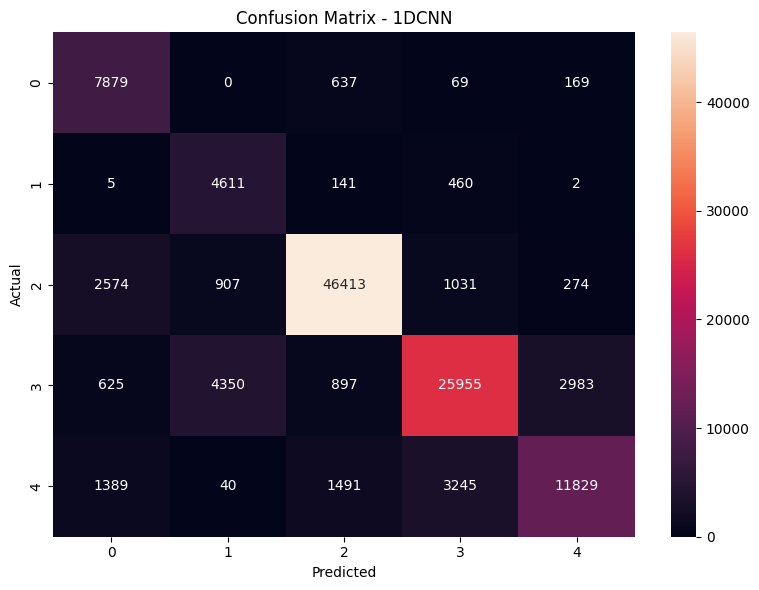


Training RNN...
--------------------------------------------------


c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Initial memory usage: 0.33 MB
Epoch 1/5
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.7950 - loss: 0.5581 - val_accuracy: 0.6947 - val_loss: 0.7263 - learning_rate: 0.0010
Epoch 2/5
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8633 - loss: 0.3736 - val_accuracy: 0.7246 - val_loss: 0.6492 - learning_rate: 0.0010
Epoch 3/5
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8714 - loss: 0.3505 - val_accuracy: 0.7431 - val_loss: 0.5921 - learning_rate: 0.0010
Epoch 4/5
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8763 - loss: 0.3369 - val_accuracy: 0.7605 - val_loss: 0.5447 - learning_rate: 0.0010
Epoch 5/5
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8800 - loss: 0.3264 - val_accuracy: 0.7683 - val_loss: 0.5432 - learning_rate: 0.0010
Final memory usage: 0.32 MB
Average inference time: 60.28 ± 11.49 ms
922/922 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  

RNN Results:
Accuracy: 0.8499

Classification Report:
              precision    recall

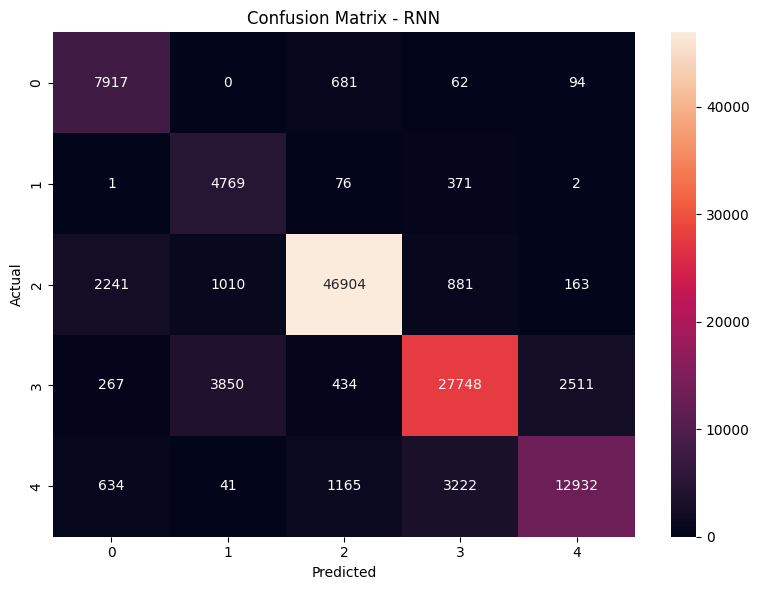


Training DNN...
--------------------------------------------------
Initial memory usage: 0.01 MB
Epoch 1/5


c:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6400/6400 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.7974 - loss: 0.5459 - val_accuracy: 0.7125 - val_loss: 0.6792 - learning_rate: 0.0010
Epoch 2/5
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8614 - loss: 0.3734 - val_accuracy: 0.7520 - val_loss: 0.5902 - learning_rate: 0.0010
Epoch 3/5
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8700 - loss: 0.3491 - val_accuracy: 0.7698 - val_loss: 0.5538 - learning_rate: 0.0010
Epoch 4/5
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8740 - loss: 0.3357 - val_accuracy: 0.7919 - val_loss: 0.5098 - learning_rate: 0.0010
Epoch 5/5
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8775 - loss: 0.3266 - val_accuracy: 0.7868 - val_loss: 0.5012 - learning_rate: 0.0010
Final memory usage: 0.04 MB
Average inference time: 52.85 ± 6.65 ms
922/922 ━━━━━━━━━━━━━━━━━━━━ 1s 644us/step

DNN Results:
Accuracy: 0.8520

Classification Report:
              precision    recall  f1-score   support

           0       

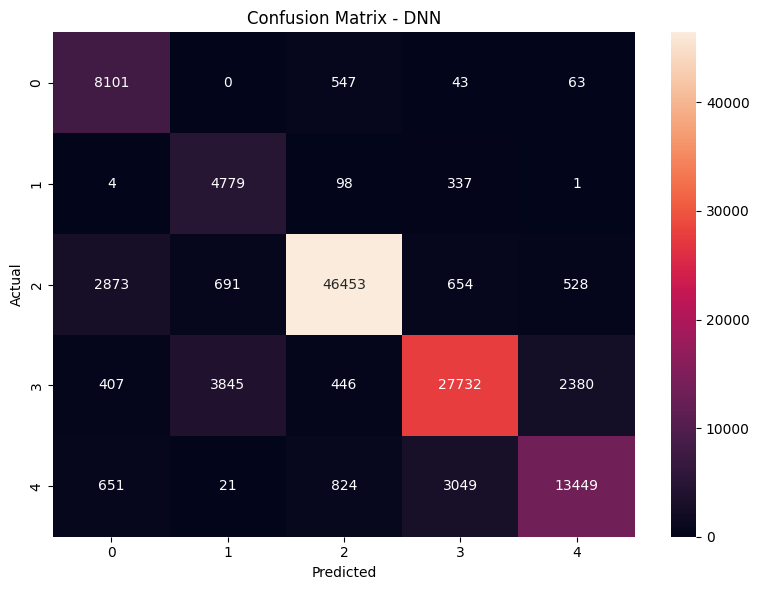


Training LSTM...
--------------------------------------------------


c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Initial memory usage: 0.07 MB
Epoch 1/5
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - accuracy: 0.7234 - loss: 0.7086 - val_accuracy: 0.7400 - val_loss: 0.6453 - learning_rate: 0.0010
Epoch 2/5
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - accuracy: 0.8655 - loss: 0.3683 - val_accuracy: 0.7168 - val_loss: 0.6838 - learning_rate: 0.0010
Epoch 3/5
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.8771 - loss: 0.3361 - val_accuracy: 0.7693 - val_loss: 0.5469 - learning_rate: 0.0010
Epoch 4/5
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 50s 8ms/step - accuracy: 0.8837 - loss: 0.3150 - val_accuracy: 0.7630 - val_loss: 0.5374 - learning_rate: 0.0010
Epoch 5/5
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 64s 10ms/step - accuracy: 0.8876 - loss: 0.3043 - val_accuracy: 0.7731 - val_loss: 0.5400 - learning_rate: 0.0010
Final memory usage: 0.11 MB
Average inference time: 58.00 ± 13.91 ms
922/922 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

LSTM Results:
Accuracy: 0.8553

Classification Report:
              precision    recall

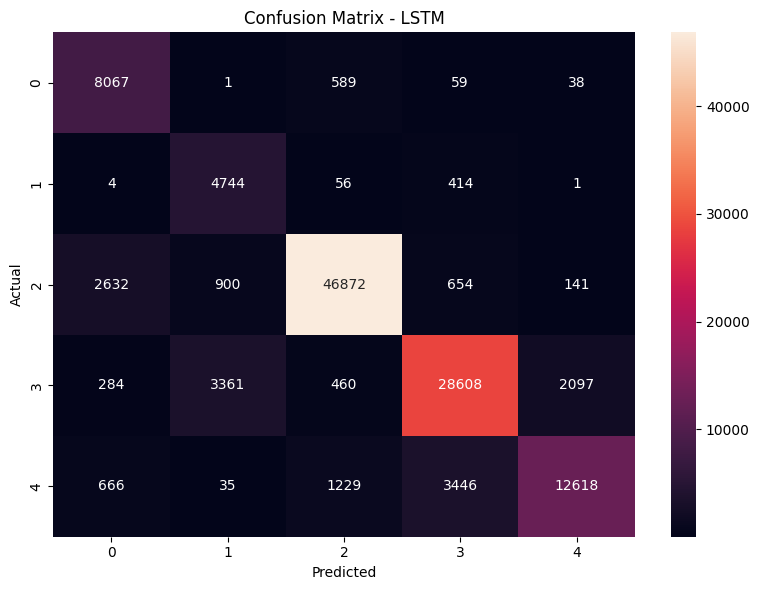


Training BiLSTM...
--------------------------------------------------


c:\Python312\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Initial memory usage: 0.35 MB
Epoch 1/5
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 56s 8ms/step - accuracy: 0.7387 - loss: 0.6803 - val_accuracy: 0.7115 - val_loss: 0.6907 - learning_rate: 0.0010
Epoch 2/5
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 52s 8ms/step - accuracy: 0.8668 - loss: 0.3667 - val_accuracy: 0.7920 - val_loss: 0.5042 - learning_rate: 0.0010
Epoch 3/5
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 58s 9ms/step - accuracy: 0.8781 - loss: 0.3322 - val_accuracy: 0.7781 - val_loss: 0.5358 - learning_rate: 0.0010
Epoch 4/5
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 56s 9ms/step - accuracy: 0.8853 - loss: 0.3114 - val_accuracy: 0.7956 - val_loss: 0.4843 - learning_rate: 0.0010
Epoch 5/5
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 55s 9ms/step - accuracy: 0.8900 - loss: 0.2960 - val_accuracy: 0.7822 - val_loss: 0.4836 - learning_rate: 0.0010
Final memory usage: 0.59 MB
Average inference time: 63.71 ± 24.33 ms
922/922 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step

BiLSTM Results:
Accuracy: 0.8734

Classification Report:
              precision    recal

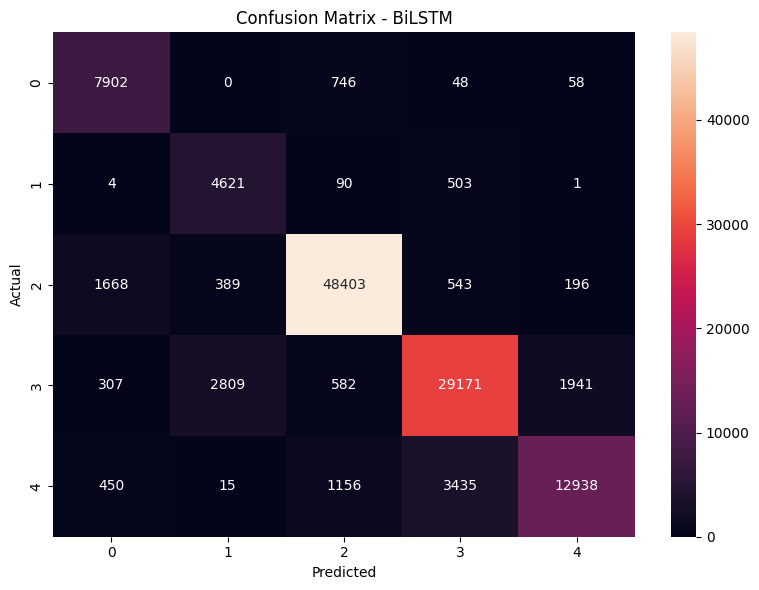


Training CNN-LSTM...
--------------------------------------------------


c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Initial memory usage: 0.16 MB
Epoch 1/5
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.7376 - loss: 0.7067 - val_accuracy: 0.6502 - val_loss: 0.8440 - learning_rate: 0.0010
Epoch 2/5
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.8510 - loss: 0.4190 - val_accuracy: 0.7312 - val_loss: 0.6335 - learning_rate: 0.0010
Epoch 3/5
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.8622 - loss: 0.3834 - val_accuracy: 0.7560 - val_loss: 0.5830 - learning_rate: 0.0010
Epoch 4/5
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.8674 - loss: 0.3649 - val_accuracy: 0.7171 - val_loss: 0.6338 - learning_rate: 0.0010
Epoch 5/5
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.8722 - loss: 0.3508 - val_accuracy: 0.7285 - val_loss: 0.6407 - learning_rate: 0.0010
Final memory usage: 0.66 MB
Average inference time: 56.67 ± 12.70 ms
922/922 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

CNN-LSTM Results:
Accuracy: 0.8425

Classification Report:
              precision    rec

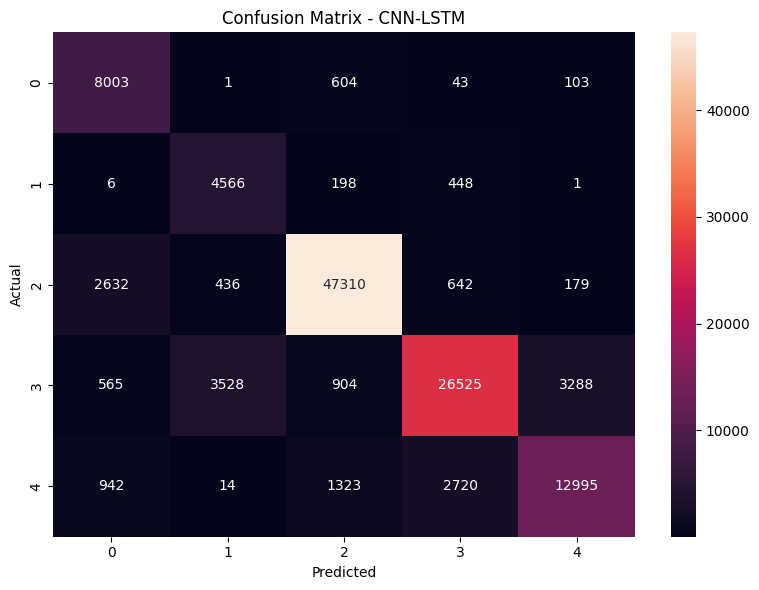


Training CNN-BiLSTM...
--------------------------------------------------


c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Initial memory usage: 0.46 MB
Epoch 1/5
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.7325 - loss: 0.7209 - val_accuracy: 0.7067 - val_loss: 0.7190 - learning_rate: 0.0010
Epoch 2/5
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.8487 - loss: 0.4276 - val_accuracy: 0.7167 - val_loss: 0.6799 - learning_rate: 0.0010
Epoch 3/5
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.8588 - loss: 0.3956 - val_accuracy: 0.7135 - val_loss: 0.6466 - learning_rate: 0.0010
Epoch 4/5
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.8650 - loss: 0.3761 - val_accuracy: 0.7306 - val_loss: 0.6186 - learning_rate: 0.0010
Epoch 5/5
6400/6400 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 0.8677 - loss: 0.3658 - val_accuracy: 0.7369 - val_loss: 0.5975 - learning_rate: 0.0010
Final memory usage: 1.47 MB
Average inference time: 56.44 ± 21.94 ms
922/922 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

CNN-BiLSTM Results:
Accuracy: 0.8401

Classification Report:
              precision    r

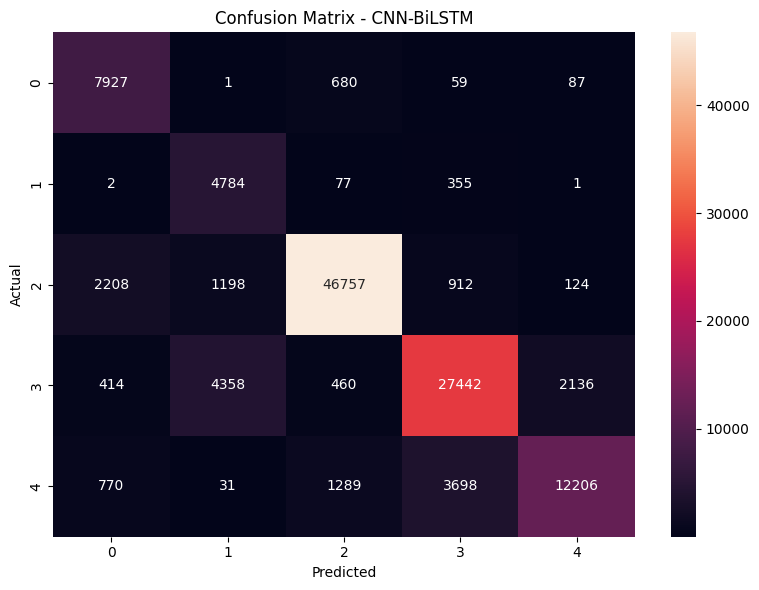

In [22]:
results = {}
BATCH_SIZE = 128
EPOCHS = 5

# Clear any existing models
tf.keras.backend.clear_session()

for name, create_model in model_functions.items():
    print(f"\nTraining {name}...")
    print("-" * 50)

    # Create model
    model = create_model()

    # Log initial memory usage
    initial_memory = get_model_memory_usage(model)
    print(f"Initial memory usage: {initial_memory:.2f} MB")

    # Compile model
    optimizer = Adam(learning_rate=0.001)
    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )

    # Callbacks
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor="val_loss", patience=5, restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor="val_loss", factor=0.2, patience=3, min_lr=0.0001
        ),
        tf.keras.callbacks.TensorBoard(log_dir=f"logs/{name}", histogram_freq=1),
    ]

    # Train model
    history = model.fit(
        X_train_reshaped,
        y_train,
        validation_split=0.2,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        callbacks=callbacks,
        verbose=1,
    )

    # Measure final memory usage
    final_memory = get_model_memory_usage(model)
    print(f"Final memory usage: {final_memory:.2f} MB")

    # Measure inference time
    avg_time, std_time = measure_inference_time(model, X_test_reshaped)
    print(f"Average inference time: {avg_time:.2f} ± {std_time:.2f} ms")

    # Evaluate model
    y_pred = np.argmax(model.predict(X_test_reshaped, batch_size=BATCH_SIZE), axis=1)

    # Store results
    results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "history": history.history,
        "model": model,
        "predictions": y_pred,
        "memory_usage": final_memory,
        "inference_time": avg_time,
        "inference_std": std_time,
    }

    # Print results
    print(f"\n{name} Results:")
    print(f"Accuracy: {results[name]['accuracy']:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # Log training metrics
    log_training_metrics(history, name)

    # Save model
    model.save(f"models/{name}.h5")

    # Clear session for next model
    tf.keras.backend.clear_session()

## 4. Compare Model Metrics

Model Comparison:
     Model  Accuracy  Memory (MB)  Inference (ms)  Parameters
     1DCNN  0.819548     0.070312       64.480309        7589
       RNN  0.849919     0.324219       60.283098        6469
       DNN  0.851987     0.039062       52.849696       11781
      LSTM  0.855335     0.105469       57.998796       19141
    BiLSTM  0.873356     0.593750       63.706541       38085
  CNN-LSTM  0.842536     0.656250       56.668882        8021
CNN-BiLSTM  0.840137     1.472656       56.440706        5973


C:\Windows\Temp\ipykernel_33688\3776034188.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_comparison["Model"], rotation=45)
C:\Windows\Temp\ipykernel_33688\3776034188.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(df_comparison["Model"], rotation=45)
C:\Windows\Temp\ipykernel_33688\3776034188.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(df_comparison["Model"], rotation=45)
C:\Windows\Temp\ipykernel_33688\3776034188.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(df_comparison["Model"], rotation=45)


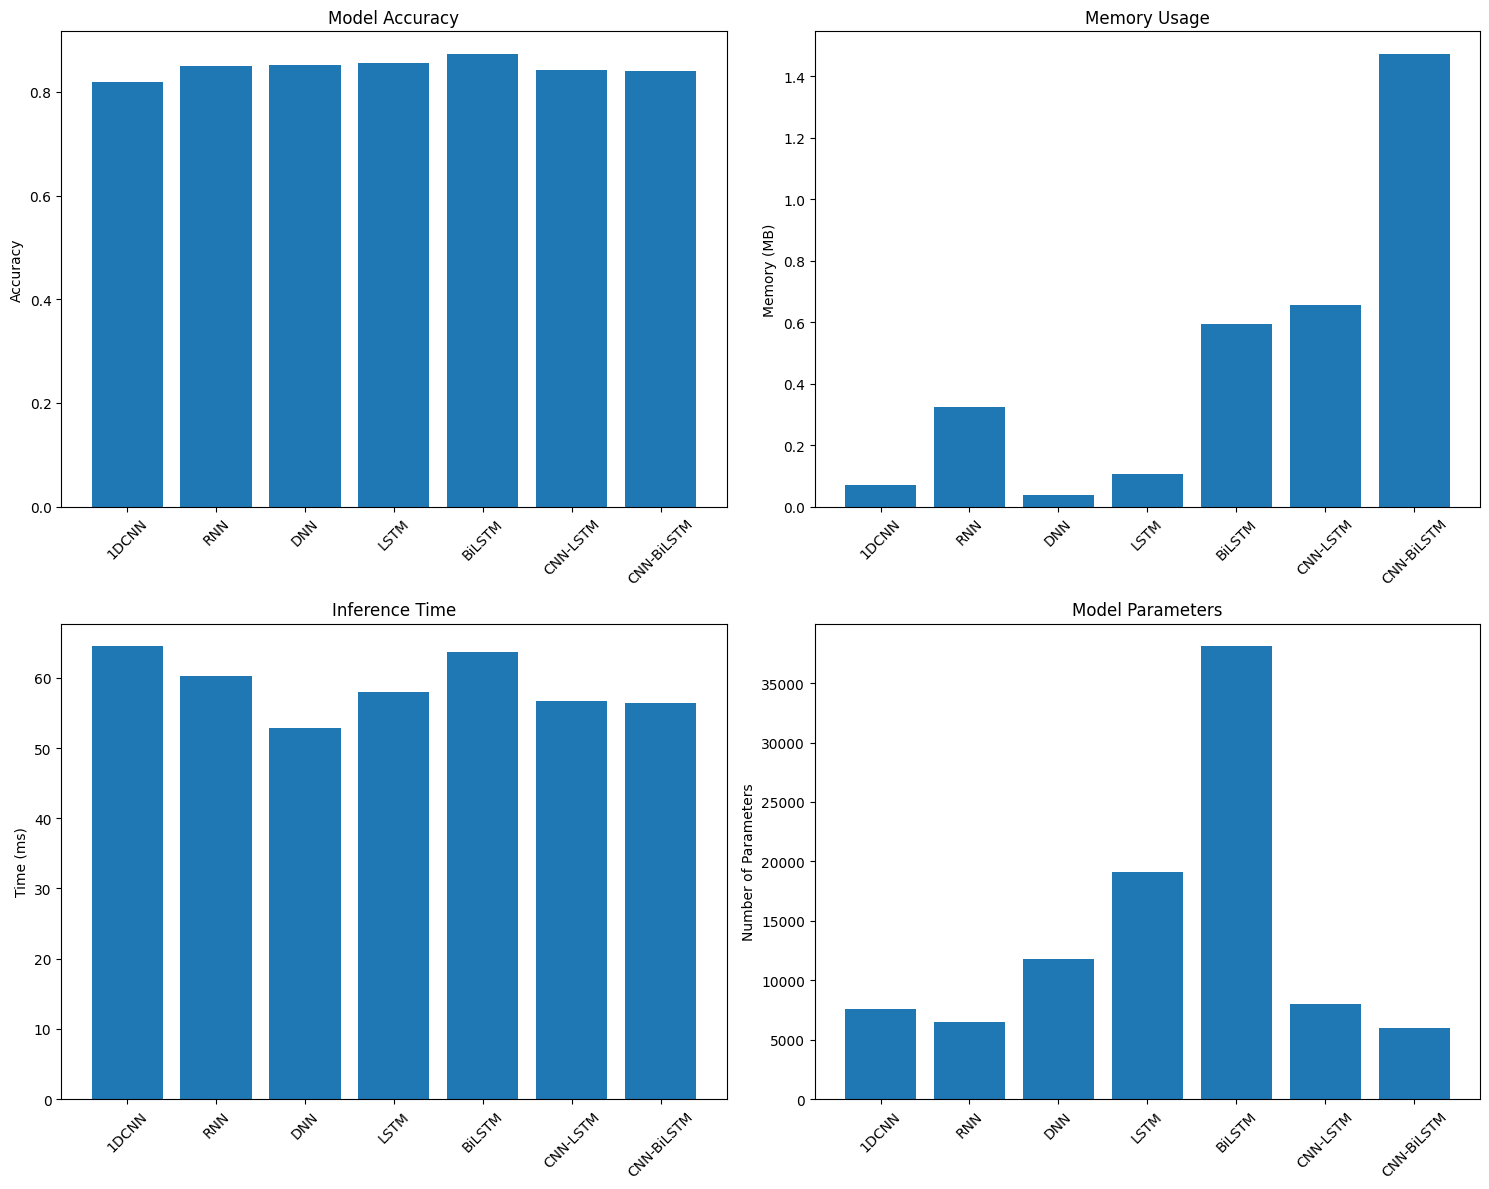


Results saved successfully!


In [24]:
# Create comparison DataFrame
comparison_data = [
    {
        "Model": name,
        "Accuracy": res["accuracy"],
        "Memory (MB)": res["memory_usage"],
        "Inference (ms)": res["inference_time"],
        "Parameters": res["model"].count_params(),
    }
    for name, res in results.items()
]

import pandas as pd

df_comparison = pd.DataFrame(comparison_data)
print("Model Comparison:")
print(df_comparison.to_string(index=False))

# Plot comparisons
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Accuracy comparison
ax1.bar(df_comparison["Model"], df_comparison["Accuracy"])
ax1.set_title("Model Accuracy")
ax1.set_xticklabels(df_comparison["Model"], rotation=45)
ax1.set_ylabel("Accuracy")

# Memory usage comparison
ax2.bar(df_comparison["Model"], df_comparison["Memory (MB)"])
ax2.set_title("Memory Usage")
ax2.set_xticklabels(df_comparison["Model"], rotation=45)
ax2.set_ylabel("Memory (MB)")

# Inference time comparison
ax3.bar(df_comparison["Model"], df_comparison["Inference (ms)"])
ax3.set_title("Inference Time")
ax3.set_xticklabels(df_comparison["Model"], rotation=45)
ax3.set_ylabel("Time (ms)")

# Parameter count comparison
ax4.bar(df_comparison["Model"], df_comparison["Parameters"])
ax4.set_title("Model Parameters")
ax4.set_xticklabels(df_comparison["Model"], rotation=45)
ax4.set_ylabel("Number of Parameters")

plt.tight_layout()
plt.show()

# Save results
with open("results/training_results.pkl", "wb") as f:
    pickle.dump(results, f)

df_comparison.to_csv("results/model_comparison.csv", index=False)

print("\nResults saved successfully!")

---

# Model Optimization

This notebook focuses on making models lightweight and efficient using:
1. Model pruning
2. Weight quantization
3. Tensor compression
4. Architecture optimization

In [25]:
import os
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Create models directory
os.makedirs("models", exist_ok=True)

## 1. Load Training Results

In [26]:
# Load training results
with open("results/training_results.pkl", "rb") as f:
    results = pickle.load(f)

# Compare model sizes and accuracies
print("Model Performance Summary:")
print("-" * 50)
for name, result in results.items():
    model = result["model"]
    params = model.count_params()
    accuracy = result["accuracy"]
    print(f"{name}:")
    print(f"Parameters: {params:,}")
    print(f"Accuracy: {accuracy:.4f}\n")

c:\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
c:\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 9 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model Performance Summary:
--------------------------------------------------
1DCNN:
Parameters: 7,589
Accuracy: 0.8195

RNN:
Parameters: 6,469
Accuracy: 0.8499

DNN:
Parameters: 11,781
Accuracy: 0.8520

LSTM:
Parameters: 19,141
Accuracy: 0.8553

BiLSTM:
Parameters: 38,085
Accuracy: 0.8734

CNN-LSTM:
Parameters: 8,021
Accuracy: 0.8425

CNN-BiLSTM:
Parameters: 5,973
Accuracy: 0.8401



c:\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
c:\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 13 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
c:\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 16 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


## 2. Model Size Analysis


Model: 1DCNN
Total size: 90.70 KB

Parameters by layer:
conv1d: 192
conv1d_1: 4,128
max_pooling1d: 0
flatten: 0
dense: 3,104
dropout: 0
dense_1: 165

Model: RNN
Total size: 77.84 KB

Parameters by layer:
simple_rnn: 4,224
dense: 2,080
dropout: 0
dense_1: 165

Model: DNN
Total size: 123.24 KB

Parameters by layer:
flatten: 0
dense: 1,280
dropout: 0
dense_1: 8,256
dense_2: 2,080
dense_3: 165

Model: LSTM
Total size: 178.37 KB

Parameters by layer:
lstm: 16,896
dense: 2,080
dropout: 0
dense_1: 165

Model: BiLSTM
Total size: 329.77 KB

Parameters by layer:
bidirectional: 33,792
dense: 4,128
dropout: 0
dense_1: 165

Model: CNN-LSTM
Total size: 98.60 KB

Parameters by layer:
conv1d: 96
max_pooling1d: 0
conv1d_1: 1,040
lstm: 6,272
dense: 528
dropout: 0
dense_1: 85

Model: CNN-BiLSTM
Total size: 91.54 KB

Parameters by layer:
conv1d: 96
max_pooling1d: 0
conv1d_1: 1,040
bidirectional: 4,224
dense: 528
dropout: 0
dense_1: 85


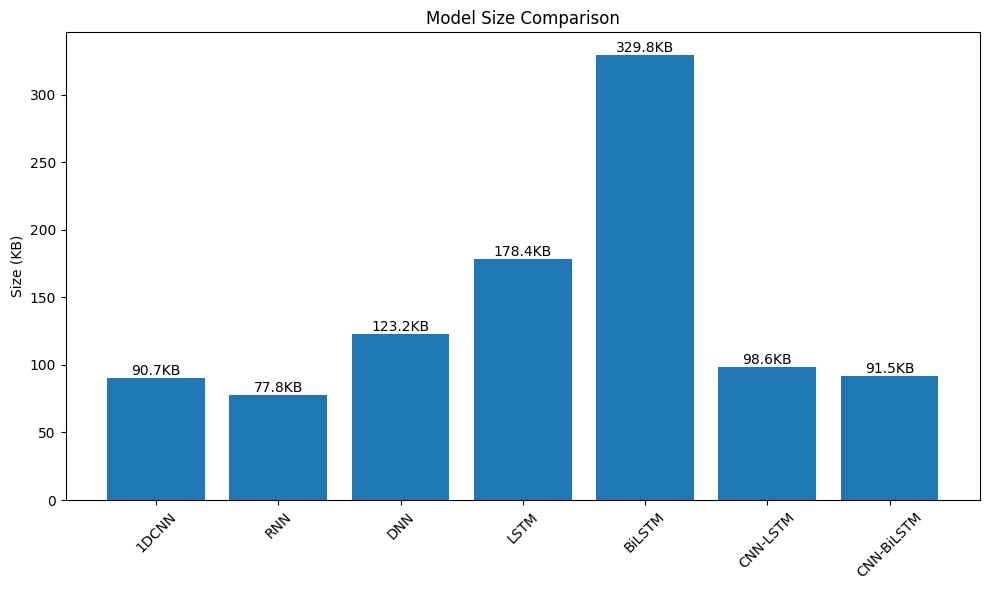

In [27]:
def analyze_model_size(model, name):
    """Analyze model size and complexity"""
    # Save original model
    base_path = f"models/{name}"
    model.save(f"{base_path}_original.h5")
    original_size = os.path.getsize(f"{base_path}_original.h5") / 1024  # KB

    # Get parameter count by layer
    layer_params = [(layer.name, layer.count_params()) for layer in model.layers]

    print(f"\nModel: {name}")
    print(f"Total size: {original_size:.2f} KB")
    print("\nParameters by layer:")
    for layer_name, params in layer_params:
        print(f"{layer_name}: {params:,}")

    return original_size, layer_params


# Analyze all models
size_analysis = {}
for name, result in results.items():
    size_analysis[name] = analyze_model_size(result["model"], name)

# Plot model sizes
plt.figure(figsize=(10, 6))
names = list(size_analysis.keys())
sizes = [analysis[0] for analysis in size_analysis.values()]

plt.bar(names, sizes)
plt.title("Model Size Comparison")
plt.ylabel("Size (KB)")
plt.xticks(rotation=45)

for i, v in enumerate(sizes):
    plt.text(i, v, f"{v:.1f}KB", ha="center", va="bottom")

plt.tight_layout()
plt.show()

## 3. Model Optimization Functions

In [28]:
def quantize_model(model):
    """Quantize model to reduce size"""
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    converter.target_spec.supported_types = [tf.float16]
    converter.target_spec.supported_ops = [
        tf.lite.OpsSet.TFLITE_BUILTINS,
        tf.lite.OpsSet.SELECT_TF_OPS,
    ]
    return converter.convert()


def compress_weights(model):
    """Apply weight compression techniques"""
    for layer in model.layers:
        if hasattr(layer, "kernel"):
            # Apply 16-bit floating point
            weights = layer.get_weights()
            weights = [w.astype(np.float16) for w in weights]
            layer.set_weights(weights)
    return model


def optimize_architecture(model):
    """Optimize model architecture"""
    # Remove unnecessary layers
    optimized_model = tf.keras.models.Sequential()

    for layer in model.layers:
        if isinstance(layer, tf.keras.layers.Dropout):
            # Adjust dropout rate
            optimized_model.add(tf.keras.layers.Dropout(0.1))
        elif isinstance(layer, tf.keras.layers.Dense):
            # Reduce dense layer size
            units = layer.units
            if layer != model.layers[-1]:  # Don't modify output layer
                units = units // 2
            optimized_model.add(
                tf.keras.layers.Dense(units, activation=layer.activation)
            )
        else:
            optimized_model.add(layer)

    return optimized_model

## 4. Apply Optimizations

In [29]:
def optimize_model(model, name, X_test, y_test):
    """Apply all optimization techniques and evaluate results"""
    print(f"\nOptimizing {name}...")

    # Save original metrics
    original_size = os.path.getsize(f"models/{name}_original.h5") / 1024
    y_pred = np.argmax(model.predict(X_test), axis=1)
    original_accuracy = accuracy_score(y_test, y_pred)

    results = {"Original": {"size": original_size, "accuracy": original_accuracy}}

    try:
        # 1. Architecture optimization
        arch_optimized = optimize_architecture(model)
        arch_optimized.compile(
            optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"],
        )
        arch_optimized.fit(X_test, y_test, epochs=5, verbose=0)  # Quick fine-tuning

        arch_optimized.save(f"models/{name}_arch_opt.h5")
        y_pred = np.argmax(arch_optimized.predict(X_test), axis=1)

        results["Architecture Optimized"] = {
            "size": os.path.getsize(f"models/{name}_arch_opt.h5") / 1024,
            "accuracy": accuracy_score(y_test, y_pred),
        }

        # 2. Weight compression
        compressed = compress_weights(arch_optimized)
        compressed.save(f"models/{name}_compressed.h5")
        y_pred = np.argmax(compressed.predict(X_test), axis=1)

        results["Compressed"] = {
            "size": os.path.getsize(f"models/{name}_compressed.h5") / 1024,
            "accuracy": accuracy_score(y_test, y_pred),
        }

        # 3. Quantization
        quantized = quantize_model(compressed)
        with open(f"models/{name}_quantized.tflite", "wb") as f:
            f.write(quantized)

        results["Quantized"] = {
            "size": os.path.getsize(f"models/{name}_quantized.tflite") / 1024,
            "accuracy": results["Compressed"]["accuracy"],  # Same as compressed model
        }

        print(f"\nOptimization Results for {name}:")
        for version, metrics in results.items():
            print(f"\n{version}:")
            print(f"Size: {metrics['size']:.2f} KB")
            print(f"Accuracy: {metrics['accuracy']:.4f}")

        return True, results

    except Exception as e:
        print(f"\nError during optimization: {str(e)}")
        return False, results


# Load test data
X_test = np.load("preprocessed/X_test.npy")
y_test = np.load("preprocessed/y_test.npy")
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Optimize all models
optimization_results = {}
for name, result in results.items():
    success, metrics = optimize_model(result["model"], name, X_test_reshaped, y_test)
    if success:
        optimization_results[name] = metrics


Optimizing 1DCNN...
3687/3687 ━━━━━━━━━━━━━━━━━━━━ 3s 884us/step


3687/3687 ━━━━━━━━━━━━━━━━━━━━ 3s 860us/step


3687/3687 ━━━━━━━━━━━━━━━━━━━━ 3s 849us/step
INFO:tensorflow:Assets written to: C:\WINDOWS\TEMP\tmphf9815rn\assets


INFO:tensorflow:Assets written to: C:\WINDOWS\TEMP\tmphf9815rn\assets


Saved artifact at 'C:\WINDOWS\TEMP\tmphf9815rn'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 9, 1), dtype=tf.float32, name='keras_tensor_135')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  2243628599632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243707424976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243628599440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243628601168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243837268368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243837269520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243837269328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243837270096: TensorSpec(shape=(), dtype=tf.resource, name=None)

Optimization Results for 1DCNN:

Original:
Size: 90.70 KB
Accuracy: 0.8195

Architecture Optimized:
Size: 105.73 KB
Accuracy: 0.8420

Compressed:
Size: 105.73 KB
A

3687/3687 ━━━━━━━━━━━━━━━━━━━━ 3s 857us/step


3687/3687 ━━━━━━━━━━━━━━━━━━━━ 3s 802us/step
INFO:tensorflow:Assets written to: C:\WINDOWS\TEMP\tmpb5rt1ten\assets


INFO:tensorflow:Assets written to: C:\WINDOWS\TEMP\tmpb5rt1ten\assets


Saved artifact at 'C:\WINDOWS\TEMP\tmpb5rt1ten'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 9, 1), dtype=tf.float32, name='keras_tensor_143')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  2243767665104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243767671248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243767670672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243120761552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243120762704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243120762512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243120763280: TensorSpec(shape=(), dtype=tf.resource, name=None)

Optimization Results for RNN:

Original:
Size: 77.84 KB
Accuracy: 0.8499

Architecture Optimized:
Size: 96.30 KB
Accuracy: 0.8767

Compressed:
Size: 96.30 KB
Accuracy: 0.8767

Quantized:
Size: 20.40 KB
Accuracy: 0.8767

Optimizing 

3687/3687 ━━━━━━━━━━━━━━━━━━━━ 2s 615us/step


3687/3687 ━━━━━━━━━━━━━━━━━━━━ 2s 557us/step
INFO:tensorflow:Assets written to: C:\WINDOWS\TEMP\tmp8ly4dsh0\assets


INFO:tensorflow:Assets written to: C:\WINDOWS\TEMP\tmp8ly4dsh0\assets


Saved artifact at 'C:\WINDOWS\TEMP\tmp8ly4dsh0'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 9, 1), dtype=tf.float32, name='keras_tensor_148')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  2243838811152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243838812496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243838812304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243838813072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243838811536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243838813648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243838813456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243838814416: TensorSpec(shape=(), dtype=tf.resource, name=None)

Optimization Results for DNN:

Original:
Size: 123.24 KB
Accuracy: 0.8520

Architecture Optimized:
Size: 76.43 KB
Accuracy: 0.8706

Compressed:
Size: 76.43 KB
Accu

3687/3687 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


3687/3687 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
INFO:tensorflow:Assets written to: C:\WINDOWS\TEMP\tmpej0vz3w8\assets


INFO:tensorflow:Assets written to: C:\WINDOWS\TEMP\tmpej0vz3w8\assets


Saved artifact at 'C:\WINDOWS\TEMP\tmpej0vz3w8'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 9, 1), dtype=tf.float32, name='keras_tensor_155')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  2243834794576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243834795536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243834796112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243838807120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243838819600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243838810768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243838807696: TensorSpec(shape=(), dtype=tf.resource, name=None)

Optimization Results for LSTM:

Original:
Size: 178.37 KB
Accuracy: 0.8553

Architecture Optimized:
Size: 244.57 KB
Accuracy: 0.8890

Compressed:
Size: 244.57 KB
Accuracy: 0.8890

Quantized:
Size: 47.29 KB
Accuracy: 0.8890

Optimiz

3687/3687 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step


3687/3687 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
INFO:tensorflow:Assets written to: C:\WINDOWS\TEMP\tmpdb6t8chk\assets


INFO:tensorflow:Assets written to: C:\WINDOWS\TEMP\tmpdb6t8chk\assets


Saved artifact at 'C:\WINDOWS\TEMP\tmpdb6t8chk'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 9, 1), dtype=tf.float32, name='keras_tensor_160')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  2243834805328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243834804944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243834806096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243834804368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243834805136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243834805712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243120774416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243120772688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243120767888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243120772304: TensorSpec(shape=(), dtype=tf.resource, name=None)

Optimization Results for Bi

3687/3687 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


3687/3687 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
INFO:tensorflow:Assets written to: C:\WINDOWS\TEMP\tmpsz51h3du\assets


INFO:tensorflow:Assets written to: C:\WINDOWS\TEMP\tmpsz51h3du\assets


Saved artifact at 'C:\WINDOWS\TEMP\tmpsz51h3du'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 9, 1), dtype=tf.float32, name='keras_tensor_165')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  2243835403088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243835404816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243835403856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243835405584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243835403472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243835406928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243835407504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243458333008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243458320144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243458321872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243458320912: TensorSpec(

3687/3687 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


3687/3687 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
INFO:tensorflow:Assets written to: C:\WINDOWS\TEMP\tmpdzkp9n91\assets


INFO:tensorflow:Assets written to: C:\WINDOWS\TEMP\tmpdzkp9n91\assets


Saved artifact at 'C:\WINDOWS\TEMP\tmpdzkp9n91'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 9, 1), dtype=tf.float32, name='keras_tensor_173')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  2243835988496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243835989264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243835988304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243835990032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243834803600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243834801872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243834802064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243835992144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243835992912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243835993488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2243125351568: TensorSpec(

## 5. Visualization of Results

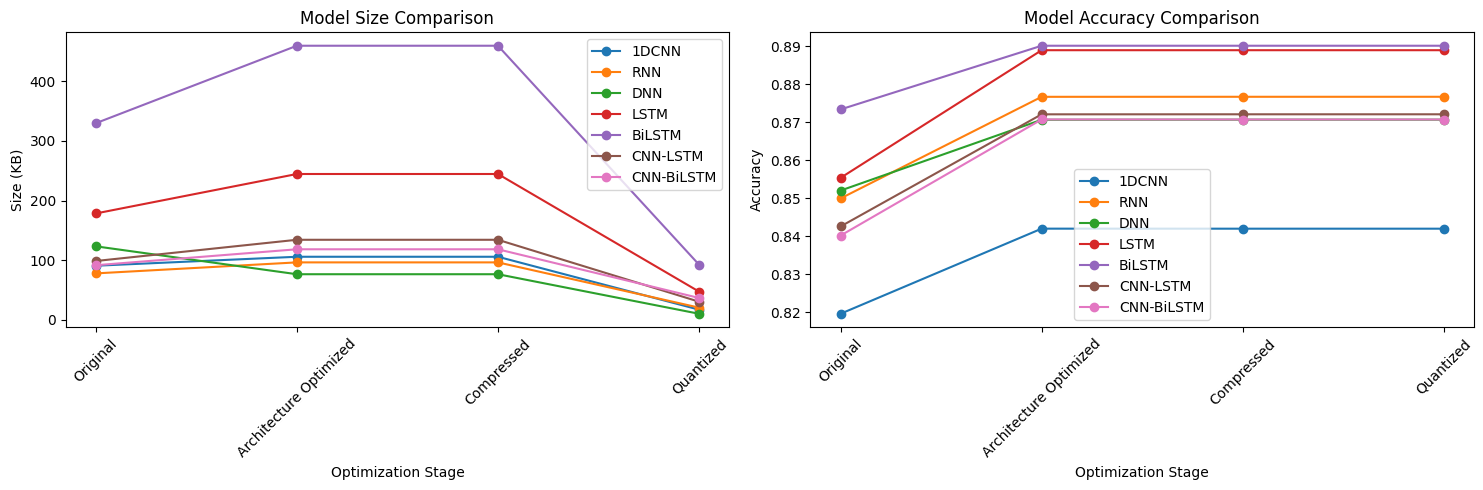


Optimization results saved successfully!


In [30]:
def plot_optimization_results(results):
    """Plot size and accuracy comparisons"""
    plt.figure(figsize=(15, 5))

    # Size comparison
    plt.subplot(1, 2, 1)
    for name, metrics in results.items():
        versions = list(metrics.keys())
        sizes = [metrics[v]["size"] for v in versions]
        x = range(len(versions))
        plt.plot(x, sizes, marker="o", label=name)

    plt.title("Model Size Comparison")
    plt.xlabel("Optimization Stage")
    plt.ylabel("Size (KB)")
    plt.xticks(range(len(versions)), versions, rotation=45)
    plt.legend()

    # Accuracy comparison
    plt.subplot(1, 2, 2)
    for name, metrics in results.items():
        versions = list(metrics.keys())
        accuracies = [metrics[v]["accuracy"] for v in versions]
        x = range(len(versions))
        plt.plot(x, accuracies, marker="o", label=name)

    plt.title("Model Accuracy Comparison")
    plt.xlabel("Optimization Stage")
    plt.ylabel("Accuracy")
    plt.xticks(range(len(versions)), versions, rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.show()


# Plot results
plot_optimization_results(optimization_results)

# Save optimization results
with open("results/optimization_results.pkl", "wb") as f:
    pickle.dump(optimization_results, f)

print("\nOptimization results saved successfully!")

---

# Temperature and Humidity Prediction

This notebook implements regression models for temperature and humidity prediction using other air quality features.

Processing outliers...


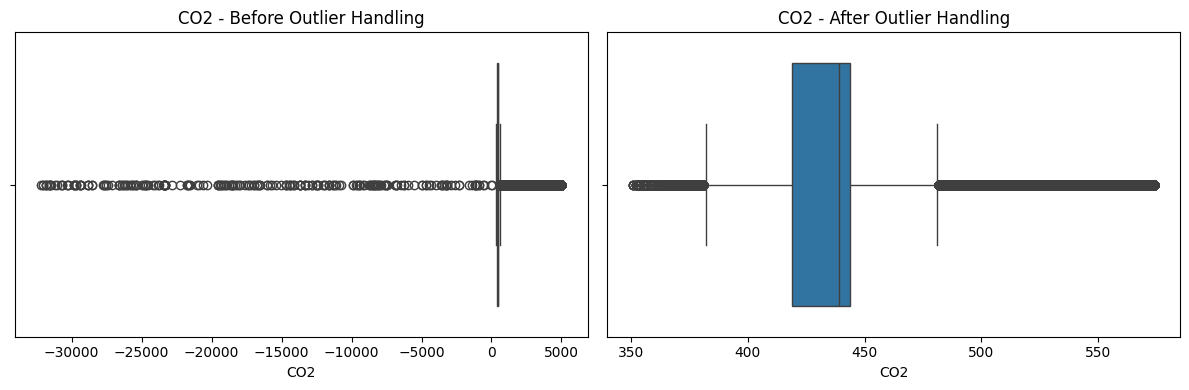


CO2 Statistics:
Outliers before: 109882 (18.63%)
Outliers after: 0 (0.00%)


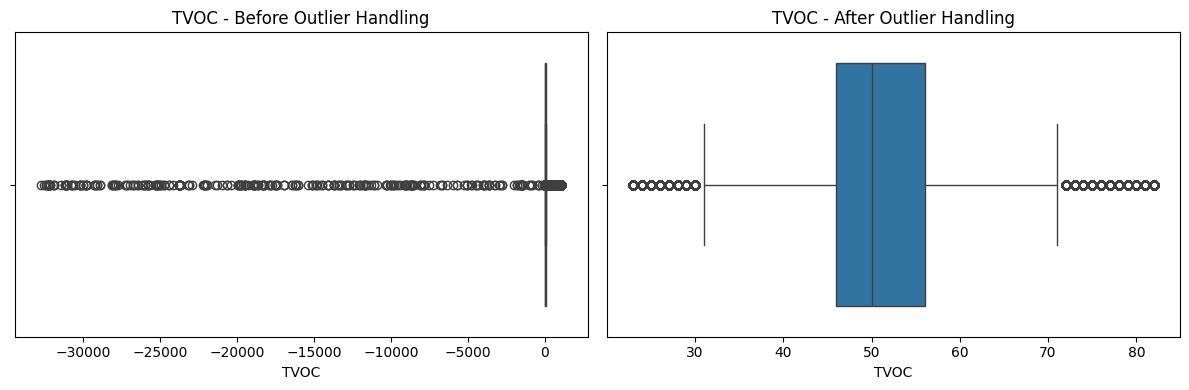


TVOC Statistics:
Outliers before: 90911 (15.41%)
Outliers after: 0 (0.00%)


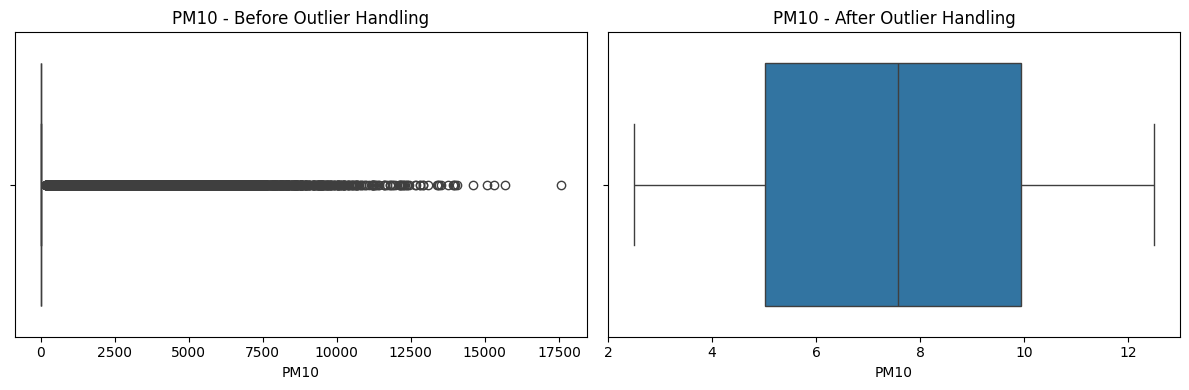


PM10 Statistics:
Outliers before: 10577 (1.79%)
Outliers after: 0 (0.00%)


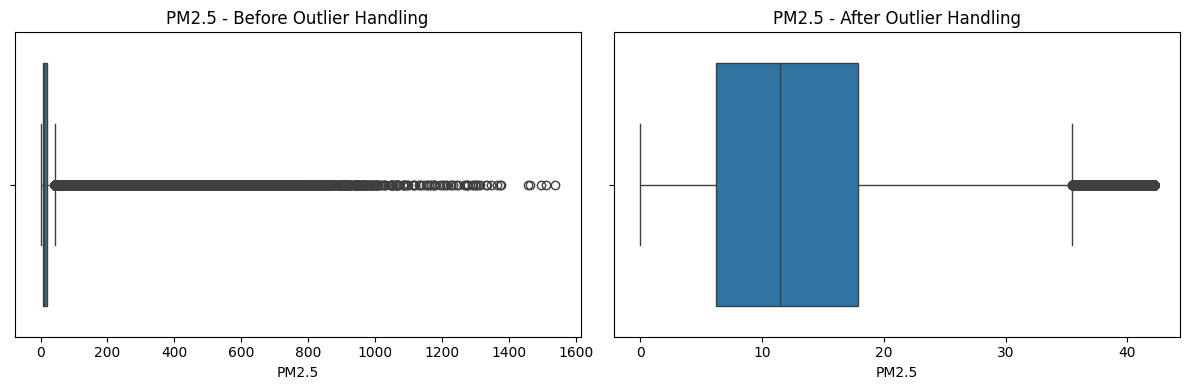


PM2.5 Statistics:
Outliers before: 32598 (5.53%)
Outliers after: 0 (0.00%)


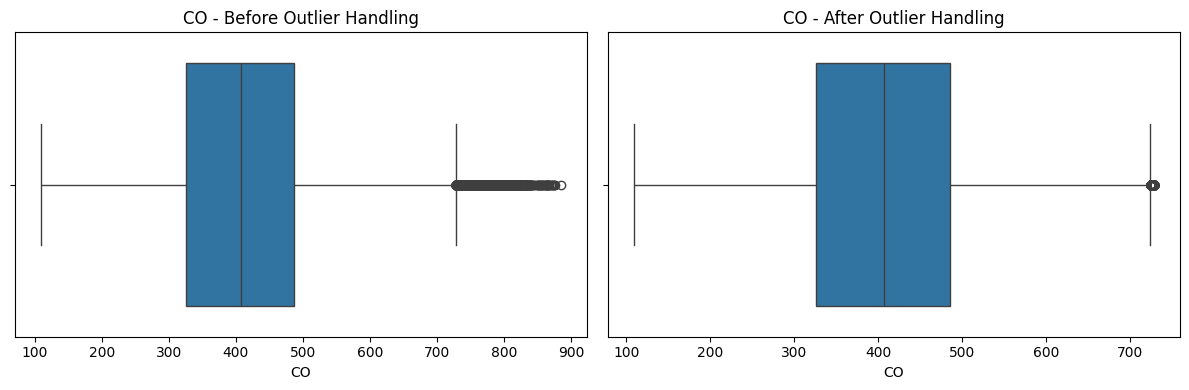


CO Statistics:
Outliers before: 2876 (0.49%)
Outliers after: 0 (0.00%)


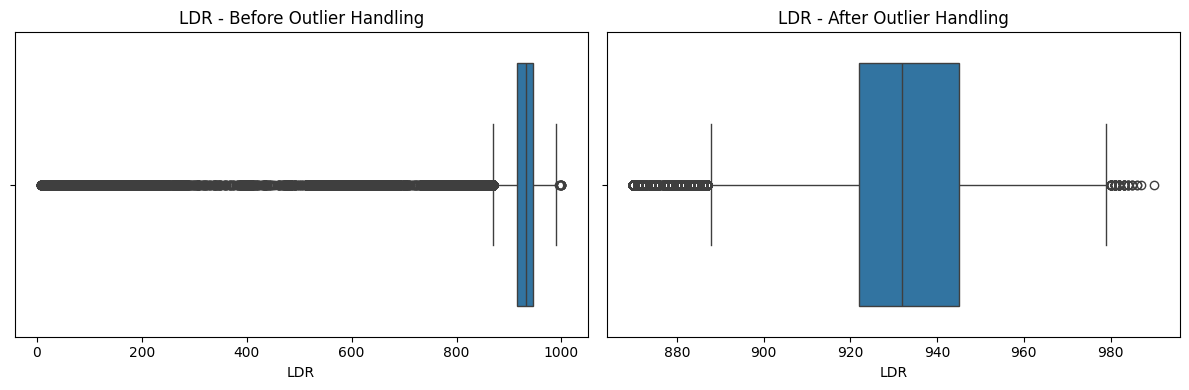


LDR Statistics:
Outliers before: 50727 (8.60%)
Outliers after: 0 (0.00%)


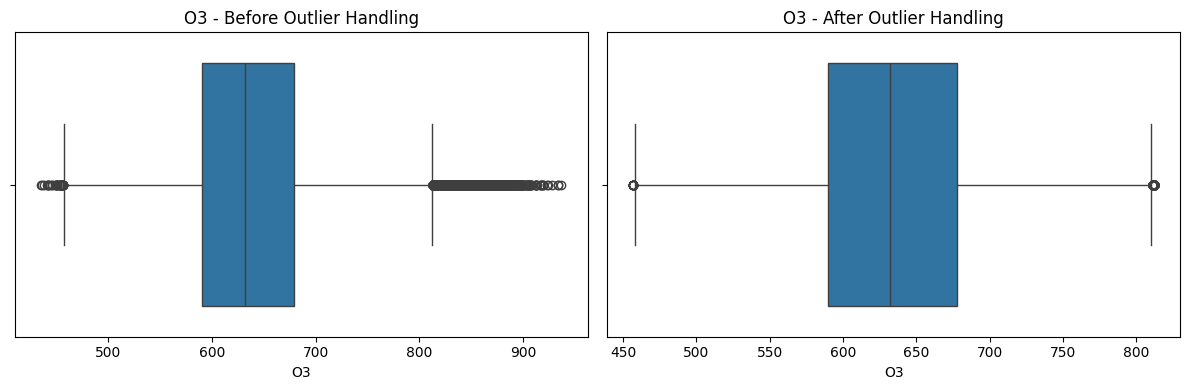


O3 Statistics:
Outliers before: 2792 (0.47%)
Outliers after: 0 (0.00%)


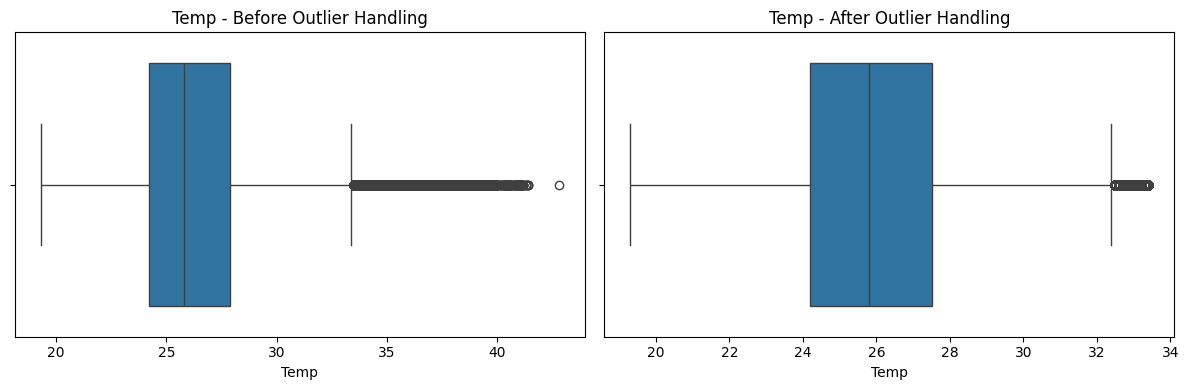


Temp Statistics:
Outliers before: 26438 (4.48%)
Outliers after: 0 (0.00%)


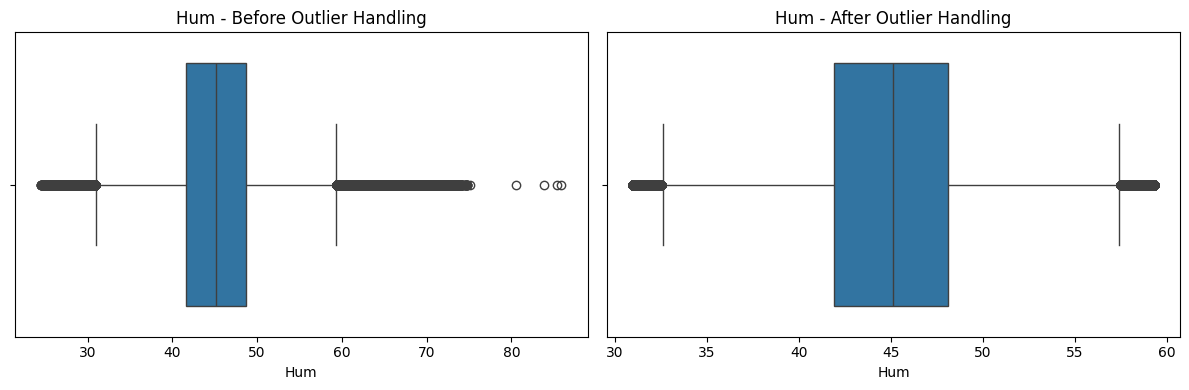


Hum Statistics:
Outliers before: 28241 (4.79%)
Outliers after: 0 (0.00%)


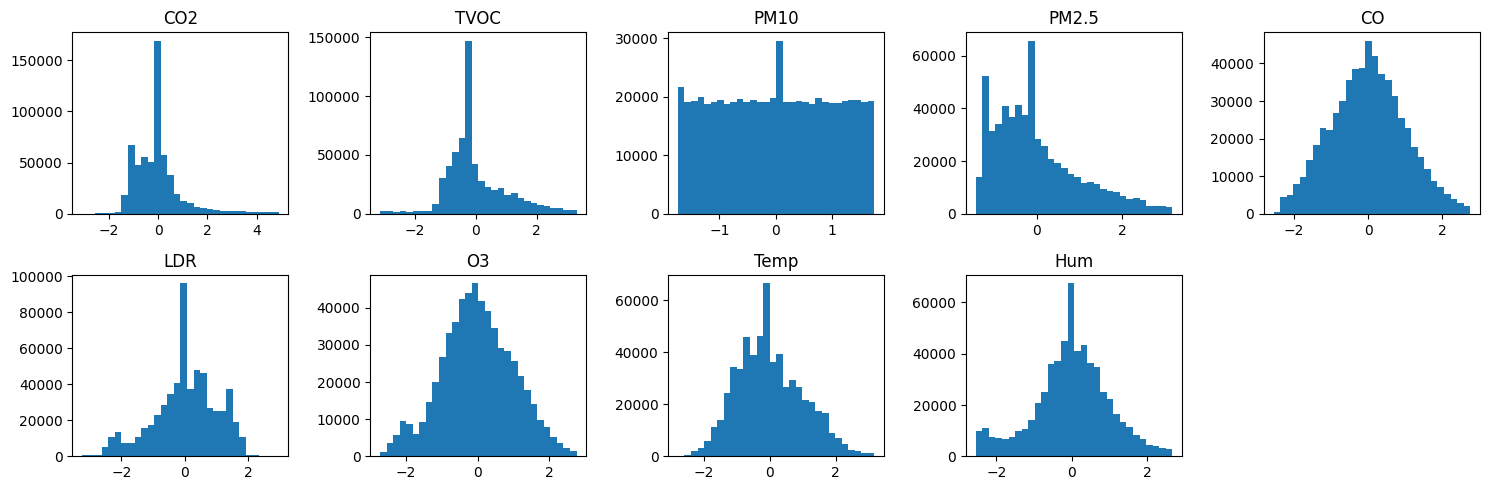

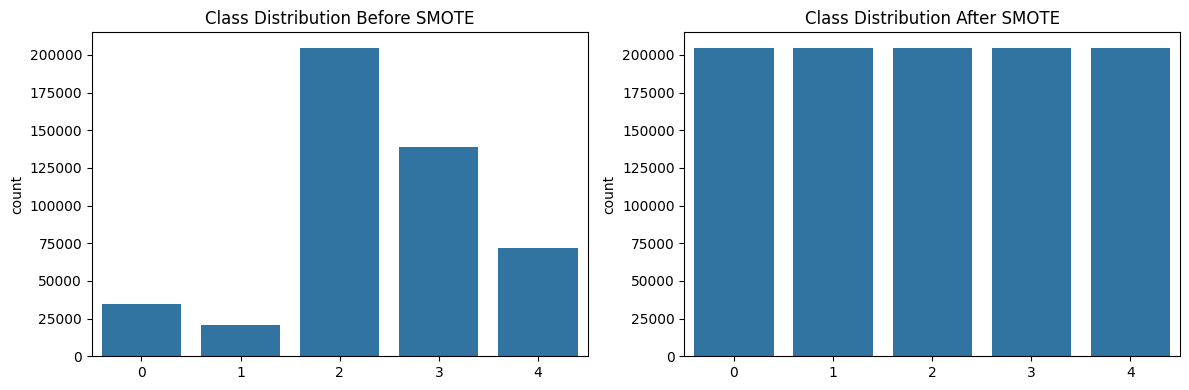


Class distribution after SMOTE:
3    204795
2    204795
4    204795
0    204795
1    204795
Name: count, dtype: int64


Input features: 9
Output classes: 5


## 1. Data Preparation

In [32]:
# Load and prepare data
df = pd.read_csv("data.csv")

# Select features for prediction (excluding temperature and humidity)
reg_features = ["CO2", "TVOC", "PM10", "PM2.5", "CO", "LDR", "O3"]
X_reg = df[reg_features]
y_temp = df["Temp"]
y_hum = df["Hum"]

# Split data
X_train_reg, X_test_reg, y_train_temp, y_test_temp = train_test_split(
    X_reg, y_temp, test_size=0.2, random_state=42
)
_, _, y_train_hum, y_test_hum = train_test_split(
    X_reg, y_hum, test_size=0.2, random_state=42
)

# Scale features
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

print("Data shapes:")
print(f"Training features: {X_train_reg_scaled.shape}")
print(f"Test features: {X_test_reg_scaled.shape}")

Data shapes:
Training features: (471900, 7)
Test features: (117976, 7)


## 2. Temperature Prediction Model

In [33]:
def create_regression_model(input_dim):
    model = Sequential(
        [
            Dense(128, activation="relu", input_shape=(input_dim,)),
            Dense(64, activation="relu"),
            Dense(32, activation="relu"),
            Dense(1),
        ]
    )
    return model


# Create and train temperature model
print("Training Temperature Prediction Model...")
temp_model = create_regression_model(len(reg_features))
temp_model.compile(optimizer="adam", loss="mse")

temp_history = temp_model.fit(
    X_train_reg_scaled, y_train_temp, epochs=50, validation_split=0.2, verbose=1
)

# Make predictions
temp_pred = temp_model.predict(X_test_reg_scaled).flatten()

# Calculate metrics
temp_metrics = {
    "MSE": mean_squared_error(y_test_temp, temp_pred),
    "RMSE": np.sqrt(mean_squared_error(y_test_temp, temp_pred)),
    "R²": r2_score(y_test_temp, temp_pred),
    "MAE": mean_absolute_error(y_test_temp, temp_pred),
}

print("\nTemperature Prediction Metrics:")
for metric, value in temp_metrics.items():
    print(f"{metric}: {value:.4f}")

Training Temperature Prediction Model...
Epoch 1/50


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11798/11798 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 26.7093 - val_loss: 4.4551
Epoch 2/50
11798/11798 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 4.3549 - val_loss: 3.9219
Epoch 3/50
 6080/11798 ━━━━━━━━━━━━━━━━━━━━ 5s 947us/step - loss: 3.9967

KeyboardInterrupt: 

## 3. Humidity Prediction Model

In [34]:
# Create and train humidity model
print("Training Humidity Prediction Model...")
hum_model = create_regression_model(len(reg_features))
hum_model.compile(optimizer="adam", loss="mse")

hum_history = hum_model.fit(
    X_train_reg_scaled, y_train_hum, epochs=50, validation_split=0.2, verbose=1
)

# Make predictions
hum_pred = hum_model.predict(X_test_reg_scaled).flatten()

# Calculate metrics
hum_metrics = {
    "MSE": mean_squared_error(y_test_hum, hum_pred),
    "RMSE": np.sqrt(mean_squared_error(y_test_hum, hum_pred)),
    "R²": r2_score(y_test_hum, hum_pred),
    "MAE": mean_absolute_error(y_test_hum, hum_pred),
}

print("\nHumidity Prediction Metrics:")
for metric, value in hum_metrics.items():
    print(f"{metric}: {value:.4f}")

Training Humidity Prediction Model...
Epoch 1/50


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 4509/11798 ━━━━━━━━━━━━━━━━━━━━ 6s 921us/step - loss: 193.8269

KeyboardInterrupt: 

## 4. Visualization of Results

In [ ]:
# Plot training history
plt.figure(figsize=(15, 5))

# Temperature training history
plt.subplot(1, 2, 1)
plt.plot(temp_history.history['loss'], label='Training')
plt.plot(temp_history.history['val_loss'], label='Validation')
plt.title('Temperature Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()

# Humidity training history
plt.subplot(1, 2, 2)
plt.plot(hum_history.history['loss'], label='Training')
plt.plot(hum_history.history['val_loss'], label='Validation')
plt.title('Humidity Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()

plt.tight_layout()
plt.show()

# Plot predictions vs actual values
plt.figure(figsize=(15, 5))

# Temperature predictions
plt.subplot(1, 2, 1)
plt.scatter(y_test_temp, temp_pred, alpha=0.5)
plt.plot([y_test_temp.min(), y_test_temp.max()],
         [y_test_temp.min(), y_test_temp.max()], 'r--')
plt.title(f'Temperature Prediction (R² = {temp_metrics["R²"]:.4f})')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')

# Humidity predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test_hum, hum_pred, alpha=0.5)
plt.plot([y_test_hum.min(), y_test_hum.max()],
         [y_test_hum.min(), y_test_hum.max()], 'r--')
plt.title(f'Humidity Prediction (R² = {hum_metrics["R²"]:.4f})')
plt.xlabel('Actual Humidity')
plt.ylabel('Predicted Humidity')

plt.tight_layout()
plt.show()

## 5. Save Results

In [ ]:
# Create models directory
os.makedirs('models', exist_ok=True)

# Save models
temp_model.save('models/temperature_model.h5')
hum_model.save('models/humidity_model.h5')

# Save metrics
metrics = {
    'Temperature': temp_metrics,
    'Humidity': hum_metrics
}

import pickle
with open('results/regression_metrics.pkl', 'wb') as f:
    pickle.dump(metrics, f)

print("Models and metrics saved successfully!")

---

# Visualization and Comparison

This notebook provides comprehensive visualizations comparing all models, including hybrid architectures, with focus on:
1. Model accuracy
2. Model size and efficiency
3. Optimization results
4. Performance trade-offs

In [35]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
plt.style.use("seaborn")
sns.set_palette("husl")

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

## 1. Load Results

In [ ]:
# Load all results
with open('results/training_results.pkl', 'rb') as f:
    training_results = pickle.load(f)

with open('results/optimization_results.pkl', 'rb') as f:
    optimization_results = pickle.load(f)

with open('results/regression_metrics.pkl', 'rb') as f:
    regression_metrics = pickle.load(f)

## 2. Model Performance Comparison

In [ ]:
def create_comparison_df():
    """Create DataFrame with model comparisons"""
    data = []
    
    for name, result in training_results.items():
        model_data = {
            'Model': name,
            'Accuracy': result['accuracy'],
            'Parameters': result['model'].count_params(),
            'Original Size (KB)': optimization_results[name]['Original']['size'],
            'Optimized Size (KB)': optimization_results[name]['Quantized']['size'],
            'Size Reduction (%)': ((optimization_results[name]['Original']['size'] - 
                                   optimization_results[name]['Quantized']['size']) / 
                                   optimization_results[name]['Original']['size'] * 100)
        }
        data.append(model_data)
    
    return pd.DataFrame(data)

comparison_df = create_comparison_df()
print("Model Comparison:")
print(comparison_df.to_string(index=False))

# Plot accuracy vs size
plt.figure(figsize=(12, 6))
plt.scatter(comparison_df['Optimized Size (KB)'], comparison_df['Accuracy'], 
           alpha=0.6, s=100)

for i, model in enumerate(comparison_df['Model']):
    plt.annotate(model, 
                 (comparison_df['Optimized Size (KB)'].iloc[i],
                  comparison_df['Accuracy'].iloc[i]))

plt.title('Model Accuracy vs Size (After Optimization)')
plt.xlabel('Model Size (KB)')
plt.ylabel('Accuracy')
plt.grid(True, alpha=0.3)
plt.show()

## 3. Optimization Impact Analysis

In [ ]:
# Plot optimization stages for each model
stages = ['Original', 'Architecture Optimized', 'Compressed', 'Quantized']
models = list(optimization_results.keys())

plt.figure(figsize=(15, 6))

# Size reduction plot
plt.subplot(1, 2, 1)
for model in models:
    sizes = [optimization_results[model][stage]['size'] for stage in stages]
    plt.plot(stages, sizes, marker='o', label=model)

plt.title('Model Size Through Optimization Stages')
plt.xlabel('Optimization Stage')
plt.ylabel('Size (KB)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Accuracy preservation plot
plt.subplot(1, 2, 2)
for model in models:
    accuracies = [optimization_results[model][stage]['accuracy'] for stage in stages]
    plt.plot(stages, accuracies, marker='o', label=model)

plt.title('Model Accuracy Through Optimization Stages')
plt.xlabel('Optimization Stage')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## 4. Hybrid Model Analysis

In [ ]:
# Focus on hybrid models
hybrid_models = ['CNN-LSTM', 'CNN-BiLSTM']
original_models = ['1DCNN', 'LSTM', 'BiLSTM']

# Compare with original architectures
hybrid_comparison = comparison_df[
    comparison_df['Model'].isin(hybrid_models + original_models)
].copy()

# Plot comparison
plt.figure(figsize=(12, 6))

# Size vs Accuracy plot
plt.subplot(1, 2, 1)
for model_type, marker, size in zip(['Original', 'Hybrid'],
                                    ['o', 's'],
                                    [100, 150]):
    mask = hybrid_comparison['Model'].isin(hybrid_models if model_type == 'Hybrid' else original_models)
    plt.scatter(hybrid_comparison[mask]['Optimized Size (KB)'],
               hybrid_comparison[mask]['Accuracy'],
               label=model_type,
               marker=marker,
               s=size,
               alpha=0.6)

for i, row in hybrid_comparison.iterrows():
    plt.annotate(row['Model'],
                 (row['Optimized Size (KB)'], row['Accuracy']))

plt.title('Hybrid vs Original Models')
plt.xlabel('Optimized Size (KB)')
plt.ylabel('Accuracy')
plt.legend()

# Size reduction comparison
plt.subplot(1, 2, 2)
bars = plt.bar(hybrid_comparison['Model'],
               hybrid_comparison['Size Reduction (%)'])

# Color bars by model type
for i, bar in enumerate(bars):
    if hybrid_comparison['Model'].iloc[i] in hybrid_models:
        bar.set_color('orange')
    else:
        bar.set_color('blue')

plt.title('Size Reduction After Optimization')
plt.xlabel('Model')
plt.ylabel('Size Reduction (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 5. Performance Trade-off Analysis

In [ ]:
def calculate_efficiency_score(row):
    """Calculate efficiency score (accuracy/size ratio)"""
    return row['Accuracy'] / row['Optimized Size (KB)'] * 1000  # Scale for readability

# Add efficiency score
comparison_df['Efficiency Score'] = comparison_df.apply(calculate_efficiency_score, axis=1)

# Plot efficiency scores
plt.figure(figsize=(10, 6))
bars = plt.bar(comparison_df['Model'], comparison_df['Efficiency Score'])

# Color bars by model type
for i, bar in enumerate(bars):
    if comparison_df['Model'].iloc[i] in hybrid_models:
        bar.set_color('orange')
    else:
        bar.set_color('blue')

plt.title('Model Efficiency (Accuracy/Size Ratio)')
plt.xlabel('Model')
plt.ylabel('Efficiency Score')
plt.xticks(rotation=45)

# Add value labels
for i, v in enumerate(comparison_df['Efficiency Score']):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print summary
print("\nModel Efficiency Summary:")
print(comparison_df[['Model', 'Accuracy', 'Optimized Size (KB)', 'Efficiency Score']]
      .sort_values('Efficiency Score', ascending=False)
      .to_string(index=False))

## 6. Save Final Results

In [ ]:
# Save comparison results
comparison_df.to_csv('results/model_comparison.csv', index=False)

# Create and save final summary
final_summary = {
    'best_model': comparison_df.loc[comparison_df['Efficiency Score'].idxmax(), 'Model'],
    'hybrid_performance': {
        model: {
            'accuracy': comparison_df[comparison_df['Model'] == model]['Accuracy'].iloc[0],
            'size': comparison_df[comparison_df['Model'] == model]['Optimized Size (KB)'].iloc[0],
            'efficiency': comparison_df[comparison_df['Model'] == model]['Efficiency Score'].iloc[0]
        }
        for model in hybrid_models
    }
}

with open('results/final_summary.pkl', 'wb') as f:
    pickle.dump(final_summary, f)

print("\nResults saved successfully!")

# Print final recommendation
print("\nFinal Recommendation:")
print(f"Best performing model (efficiency-wise): {final_summary['best_model']}")
print("\nHybrid Model Performance:")
for model, metrics in final_summary['hybrid_performance'].items():
    print(f"\n{model}:")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Optimized Size: {metrics['size']:.2f} KB")
    print(f"Efficiency Score: {metrics['efficiency']:.2f}")

---

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import tensorflow as tf

# Add project root to path for imports
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

# Import project modules
from src.config import DATA_PATH, MODEL_SAVE_PATH, RESULTS_PATH
from src.data_preprocessing import DataPreprocessor
from src.predict import predict_temp_hum, load_optimized_model
from src.visualization import Visualizer

ModuleNotFoundError: No module named 'utils'

In [2]:
# Load the optimized model
model_path = os.path.join(MODEL_SAVE_PATH, "best_model.h5")
best_model = load_optimized_model(model_path)

# Load and prepare data
df = pd.read_csv(DATA_PATH)

# Initialize preprocessor
preprocessor = DataPreprocessor()

# Select features for prediction (excluding temperature and humidity)
reg_features = ["CO2", "TVOC", "PM10", "PM2.5", "CO", "LDR", "O3"]
X_reg = df[reg_features]
y_temp = df["Temp"]
y_hum = df["Hum"]

# Preprocess data
X_reg_scaled = preprocessor.normalize_features(X_reg, None)[0]

NameError: name 'os' is not defined